In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 


# from PostProcessingScripts import * 

# to make the screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import tables

# print("PyTables version:", tables.__version__)
# print("HDF5 version:", tables.get_hdf5_version())

### See note on the end for how to download the GW data 

### some code to build up the GROWL catalog 

In [7]:
import os
import glob
from collections import defaultdict

def build_growl_catalog(base_path='/Volumes/GROWL/GROWL_bps'):
    """
    Build a dictionary structure for GROWL catalog with authors and their datasets.
    
    Structure:
    {
        'author_name': {
            'datasets': ['dataset1', 'dataset2', ...],
            'file_name': 'COMPAS_Output_Weighted.h5',
            'paths': {
                'dataset1': '/Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_25/',
                'dataset2': '/Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_5/'
            }
            'labels':{'dataset1': r'$\alpha 0.1 \ \beta=0.25$',
                      'dataset2': r'$\alpha 0.1 \ \beta=0.5$'
            
            }
        }
    }
    """
    catalog = {}
    
    if not os.path.exists(base_path):
        print(f"Base path {base_path} does not exist")
        return catalog
    
    # Get all author directories
    author_dirs = [d for d in os.listdir(base_path) 
                  if os.path.isdir(os.path.join(base_path, d)) and not d.startswith('.')]
    
    for author in author_dirs:
        author_path = os.path.join(base_path, author)
        
        # Get all dataset directories for this author
        dataset_dirs = [d for d in os.listdir(author_path) 
                       if os.path.isdir(os.path.join(author_path, d)) and not d.startswith('.')]
        
        if not dataset_dirs:
            continue
            
        # Find the common HDF5 file name by checking the first dataset
        first_dataset_path = os.path.join(author_path, dataset_dirs[0])
        h5_files = glob.glob(os.path.join(first_dataset_path, '*.h5'))
        
        if not h5_files:
            print(f"Warning: No HDF5 files found in {first_dataset_path}")
            continue
            
        # Assume the first HDF5 file is the standard one
        file_name = os.path.basename(h5_files[0])
        
        # Build paths dictionary
        paths = {}
        for dataset in dataset_dirs:
            dataset_path = os.path.join(author_path, dataset)
            # Verify the HDF5 file exists in this dataset
            expected_file = os.path.join(dataset_path, file_name)
            if os.path.exists(expected_file):
                paths[dataset] = dataset_path + '/'
            else:
                print(f"Warning: {expected_file} not found")
        
        catalog[author] = {
            'datasets': sorted(dataset_dirs),
            'file_name': file_name,
            'paths': paths
        }
    
    return catalog

def get_file_path(catalog, author, dataset):
    """
    Get the full path to an HDF5 file for a specific author and dataset.
    """
    if author not in catalog:
        raise ValueError(f"Author '{author}' not found in catalog")
    
    if dataset not in catalog[author]['paths']:
        raise ValueError(f"Dataset '{dataset}' not found for author '{author}'")
    
    path = catalog[author]['paths'][dataset]
    file_name = catalog[author]['file_name']
    return os.path.join(path, file_name)

def list_authors(catalog):
    """Get list of all authors."""
    return list(catalog.keys())

def list_datasets(catalog, author):
    """Get list of all datasets for a specific author."""
    if author not in catalog:
        raise ValueError(f"Author '{author}' not found in catalog")
    return catalog[author]['datasets']

def print_catalog_summary(catalog):
    """Print a summary of the catalog structure."""
    print("GROWL Catalog Summary:")
    print("=" * 50)
    
    for author in sorted(catalog.keys()):
        print(f"\nAuthor: {author}")
        print(f"  File: {catalog[author]['file_name']}")
        print(f"  Datasets ({len(catalog[author]['datasets'])}):")
        for dataset in catalog[author]['datasets']:
            print(f"    - {dataset}")

# Example usage:
# if __name__ == "__main__":
#     # Build the catalog
#     growl_catalog = build_growl_catalog()
    
#     # Print summary
#     print_catalog_summary(growl_catalog)
    
#     # Example iterations:
#     print("\n" + "="*50)
#     print("Example iterations:")
    
#     # Iterate over authors
#     print("\nAuthors:")
#     for author in list_authors(growl_catalog):
#         print(f"  - {author}")
    
#     # Iterate over datasets for a specific author (e.g., Boesky24)
#     if 'Boesky24' in growl_catalog:
#         print(f"\nDatasets for Boesky24:")
#         for dataset in list_datasets(growl_catalog, 'Boesky24'):
#             print(f"  - {dataset}")
#             # Get full file path
#             file_path = get_file_path(growl_catalog, 'Boesky24', dataset)
#             print(f"    Path: {file_path}")
    
#     # Example of accessing a specific file
#     print("\nExample file access:")
#     try:
#         example_path = get_file_path(growl_catalog, 'Boesky24', 'alpha0_1beta0_25')
#         print(f"Boesky24 alpha0_1beta0_25 file: {example_path}")
#     except (ValueError, KeyError) as e:
#         print(f"Could not access example file: {e}")



# Build the catalog
growl_catalog = build_growl_catalog()

# Print summary
print_catalog_summary(growl_catalog)




if 'Boesky24' in growl_catalog:
    print(f"\nDatasets for Boesky24:")
    for dataset in list_datasets(growl_catalog, 'Boesky24')[:2]:
        print(f"  - {dataset}")
        # Get full file path
        file_path = get_file_path(growl_catalog, 'Boesky24', dataset)
        print(f"    Path: {file_path}")



GROWL Catalog Summary:

Author: Boesky24
  File: COMPAS_Output_Weighted.h5
  Datasets (10):
    - alpha0_1beta0_25
    - alpha0_1beta0_5
    - alpha0_1beta0_75
    - alpha0_5beta0_25
    - alpha0_5beta0_5
    - alpha0_5beta0_75
    - alpha10_beta0_5
    - alpha10_beta0_75
    - alpha2_beta0_5
    - alpha2beta0_25

Datasets for Boesky24:
  - alpha0_1beta0_25
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_25/COMPAS_Output_Weighted.h5
  - alpha0_1beta0_5
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_5/COMPAS_Output_Weighted.h5


In [52]:
class COMPASDataProcessor:
    """Class to process COMPAS HDF5 files and extract DCO properties"""
    
    def __init__(self, solar_metallicity: float = 0.0142):
        self.solar_metallicity = solar_metallicity
        
    def analytical_star_forming_mass_per_binary_using_kroupa_imf(
        self, m1_min: float, m1_max: float, m2_min: float, 
        fbin: float = 1., imf_mass_bounds: List[float] = [0.01, 0.08, 0.5, 200]
    ) -> float:
        """
        Analytical computation of the mass of stars formed per binary star formed
        using the Kroupa IMF.
        
        Parameters
        ----------
        m1_min, m1_max : float
            Primary mass range [Msun]
        m2_min : float  
            Minimum secondary mass [Msun]
        fbin : float
            Binary fraction
        imf_mass_bounds : list
            IMF mass boundaries [Msun]
            
        Returns
        -------
        float
            Mass represented by each binary [Msun]
        """
        m1, m2, m3, m4 = imf_mass_bounds
        
        if m1_min < m3:
            raise ValueError(f"This analytical derivation requires IMF break m3 < m1_min ({m3} !< {m1_min})")
        
        alpha = (-(m4**(-1.3) - m3**(-1.3))/1.3 - 
                (m3**(-0.3) - m2**(-0.3))/(m3*0.3) + 
                (m2**0.7 - m1**0.7)/(m2*m3*0.7))**(-1)
        
        # Average mass of stars
        m_avg = alpha * (-(m4**(-0.3) - m3**(-0.3))/0.3 + 
                        (m3**0.7 - m2**0.7)/(m3*0.7) + 
                        (m2**1.7 - m1**1.7)/(m2*m3*1.7))
        
        # Fraction of binaries that COMPAS simulates
        fint = (-alpha / 1.3 * (m1_max**(-1.3) - m1_min**(-1.3)) + 
                alpha * m2_min / 2.3 * (m1_max**(-2.3) - m1_min**(-2.3)))
        
        # Mass represented by each binary
        m_rep = (1/fint) * m_avg * (1.5 + (1-fbin)/fbin)
        
        return m_rep
    
    def get_dco_mask(self, 
                     fdata: h5.File, 
                     dco_type: str = 'BBH', 
                     pessimistic: bool = True, 
                     merges_hubble: bool = True, 
                     no_RLOF_post_CE: bool = True
                    ) -> np.ndarray:
        """
        Create mask for Double Compact Objects of specified type.
        
        Parameters
        ----------
        fdata : h5py.File
            COMPAS HDF5 file
        dco_type : str
            Type of DCO: 'BBH', 'BNS', 'NSBH'
        pessimistic : bool
            pessimistic CE: True, False
        merges_hubble : bool
            mask merging in a Hubble time: True, False
        no_RLOF_post_CE : bool
            mask systems with RLOF immediately after CE (assume these are stellar mergers): True, False
        
        Returns
        -------
        dco_mask : np.ndarray
            Boolean mask for DCOs
        """
        stellar_type1 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(1)'][()]
        stellar_type2 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(2)'][()]

        
        # Pessimistic CE mask        
        if pessimistic==True:
            optimistic_ce = fdata['BSE_Common_Envelopes']['Optimistic_CE'][()]
            pessimistic_ce_mask = np.in1d(
                fdata['BSE_Double_Compact_Objects']['SEED'][()], 
                fdata['BSE_Common_Envelopes']['SEED'][()][optimistic_ce == 0]
            )
        else: pessimistic_ce_mask = np.repeat(True, len(stellar_type2))
        
        
        if merges_hubble == True: merges_hubble_mask = (fdata['BSE_Double_Compact_Objects']['Merges_Hubble_Time'][()]==1)
        else: merges_hubble_mask = np.repeat(True, len(stellar_type2))   
        
        if no_RLOF_post_CE==True:
            rlof_post_ce = fdata['BSE_Common_Envelopes']["Immediate_RLOF>CE"][()]
            no_rlof_post_ce_mask = np.in1d(
                fdata['BSE_Double_Compact_Objects']['SEED'][()], 
                fdata['BSE_Common_Envelopes']['SEED'][()][rlof_post_ce == 0]
            )
        else: no_rlof_post_ce_mask = np.repeat(True, len(stellar_type2))
        
    
            
          
        
        # Define stellar type mappings
        type_map = {'NS': 13, 'BH': 14}
        
        if dco_type == 'BBH':
            type_mask = (stellar_type1 == type_map['BH']) & (stellar_type2 == type_map['BH'])
        elif dco_type == 'BNS':
            type_mask = (stellar_type1 == type_map['NS']) & (stellar_type2 == type_map['NS'])
        elif dco_type == 'NSBH':
            type_mask = ((stellar_type1 == type_map['NS']) & (stellar_type2 == type_map['BH'])) | \
                       ((stellar_type1 == type_map['BH']) & (stellar_type2 == type_map['NS']))
        else:
            raise ValueError(f"Unknown DCO type: {dco_type}")

        dco_mask = type_mask & (merges_hubble_mask == True) & (pessimistic_ce_mask == True) & (no_rlof_post_ce_mask == True)

            
        return dco_mask
    
    def get_primary_secondary(self, m1: np.ndarray, m2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Return (primary, secondary) where primary >= secondary element-wise.
        
        Parameters
        ----------
        m1, m2 : np.ndarray
            Component masses
            
        Returns
        -------
        primary, secondary : np.ndarray
            Ordered masses
        """
        primary = np.maximum(m1, m2)
        secondary = np.minimum(m1, m2)
        return primary, secondary
    
    def chirp_mass(self, m1: np.ndarray, m2: np.ndarray) -> np.ndarray:
        """
        Compute chirp mass from component masses.
        
        Parameters
        ----------
        m1, m2 : np.ndarray
            Component masses [Msun]
            
        Returns
        -------
        np.ndarray
            Chirp masses [Msun]
        """
        return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)
    
    def process_compas_file(self, file_path: str,
                            dco_type: str = 'BBH', 
                            pessimistic: bool = True,
                            merges_hubble: bool = True, 
                            no_RLOF_post_CE: bool = True
                           ) -> DCOParameters:
        """
        Process a COMPAS HDF5 file and extract DCO parameters.
        
        Parameters
        ----------
        file_path : str
            Path to COMPAS HDF5 file
        dco_type : str
            Type of DCO to extract
        pessimistic : bool
            pessimistic CE: True, False
        merges_hubble : bool
            mask merging in a Hubble time: True, False
        no_RLOF_post_CE : bool
            mask systems with RLOF immediately after CE (assume these are stellar mergers): True, False
        
        Returns
        -------
        DCOParameters
            Container with all DCO properties
        """
        with h5.File(file_path, 'r') as fdata:
            # Get simulation parameters
            initial_mass_min = fdata['Run_Details']['initial-mass-min'][()][0]
            initial_mass_max = fdata['Run_Details']['initial-mass-max'][()][0] 
            minimum_secondary_mass = fdata['Run_Details']['minimum-secondary-mass'][()][0]
            
            # Calculate mass representation
            m_rep_per_binary = self.analytical_star_forming_mass_per_binary_using_kroupa_imf(
                m1_min=initial_mass_min, 
                m1_max=initial_mass_max,
                m2_min=minimum_secondary_mass, 
                fbin=1.0
            )
            
            n_binaries = len(fdata['BSE_System_Parameters']['SEED'][()])
            total_mass_evolved = n_binaries * m_rep_per_binary
            
            # Get DCO mask
            dco_mask = self.get_dco_mask(fdata, dco_type, pessimistic, merges_hubble, no_RLOF_post_CE)
            n_dcos = np.sum(dco_mask)
            
            if n_dcos == 0:
                print(f"Warning: No {dco_type} systems found in {file_path}")
                return None
            
            # Get system parameters for DCOs
            mask_sys_dcos = np.in1d(
                fdata['BSE_System_Parameters']['SEED'][()], 
                fdata['BSE_Double_Compact_Objects']['SEED'][()][dco_mask]
            )
            
            # Extract properties
            metallicities = fdata['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()][mask_sys_dcos]
            mixture_weights = fdata['BSE_Double_Compact_Objects']['mixture_weight'][()][dco_mask]
            formation_efficiencies = mixture_weights / total_mass_evolved
            
            delay_times = (fdata['BSE_Double_Compact_Objects']['Coalescence_Time'][()] + 
                          fdata['BSE_Double_Compact_Objects']['Time'][()])[dco_mask]
            
            # Masses
            dco_masses_1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()][dco_mask]
            dco_masses_2 = fdata['BSE_Double_Compact_Objects']['Mass(2)'][()][dco_mask]
            primary_masses, secondary_masses = self.get_primary_secondary(dco_masses_1, dco_masses_2)
            chirp_masses = self.chirp_mass(dco_masses_1, dco_masses_2)

            
        return DCOParameters(
            metallicities=metallicities,
            delay_times=delay_times,
            formation_efficiencies=formation_efficiencies,
            dco_masses_1=dco_masses_1,
            dco_masses_2=dco_masses_2,
            primary_masses=primary_masses,
            secondary_masses=secondary_masses,
            chirp_masses=chirp_masses,
            mixture_weights=mixture_weights,
            total_mass_evolved=total_mass_evolved,
            n_systems=n_dcos
        )

class COMPASPlotter:
    """Class for creating plots from processed COMPAS data"""
    
    def __init__(self, figsize: Tuple[int, int] = (10, 6), fontsize: int = 18, fontsize_lgd=8):
        self.figsize = figsize
        self.fontsize = fontsize
        self.fontsize_lgd = fontsize_lgd
        plt.rcParams.update({'font.size': fontsize})
    
    def plot_formation_efficiency_vs_metallicity(
        self, 
        data_dict: Dict[str, DCOParameters], 
        solar_metallicity: float = 0.0142,
        bins: int = 40,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot formation efficiency vs metallicity for multiple models.
        
        Parameters
        ----------
        data_dict : dict
            Dictionary with model names as keys and DCOParameters as values
        solar_metallicity : float
            Solar metallicity value
        bins : int
            Number of histogram bins
        save_path : str, optional
            Path to save the figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        fig, ax = plt.subplots(figsize=self.figsize)
        
        for model_name, data in data_dict.items():
            # Calculate histogram
            log_z_zsun = np.log10(data.metallicities / solar_metallicity)
            hist, bin_edges = np.histogram(
                log_z_zsun, 
                weights=data.formation_efficiencies, 
                bins=bins, 
                density=True
            )
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            normalization = np.sum(data.formation_efficiencies)
            
            ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
        ax.set_yscale('log')
        ax.set_ylim(10**-8, 10**-3.5)
        ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
        ax.set_xlabel(r'Metallicity $\log_{10}(Z/Z_{\odot})$', fontsize=self.fontsize)
        ax.legend(fontsize=self.fontsize_lgd)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig
    
    def plot_formation_efficiency_vs_delay_time(
        self, 
        data_dict: Dict[str, DCOParameters], 
        bins: int = 40,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot formation efficiency vs delay time for multiple models.
        
        Parameters
        ----------
        data_dict : dict
            Dictionary with model names as keys and DCOParameters as values
        bins : int
            Number of histogram bins
        save_path : str, optional
            Path to save the figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        fig, ax = plt.subplots(figsize=self.figsize)
        
        for model_name, data in data_dict.items():
            # Calculate histogram
            log_delay_times = np.log10(data.delay_times)
            hist, bin_edges = np.histogram(
                log_delay_times, 
                weights=data.formation_efficiencies, 
                bins=bins, 
                density=True
            )
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            normalization = np.sum(data.formation_efficiencies)
            
            ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
        ax.set_yscale('log')
        ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
        ax.set_xlabel(r'Delay time $\log_{10}(t_{\rm{delay}})$ [Myr]', fontsize=self.fontsize)
        ax.legend(fontsize=self.fontsize_lgd)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig
    
    def plot_mass_distribution(
        self, 
        data_dict: Dict[str, DCOParameters], 
        mass_type: str = 'primary',
        bins: int = 40,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot mass distribution for multiple models.
        
        Parameters
        ----------
        data_dict : dict
            Dictionary with model names as keys and DCOParameters as values
        mass_type : str
            Type of mass: 'primary', 'secondary', 'chirp'
        bins : int
            Number of histogram bins
        save_path : str, optional
            Path to save the figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        fig, ax = plt.subplots(figsize=self.figsize)
        
        mass_attr_map = {
            'primary': 'primary_masses',
            'secondary': 'secondary_masses', 
            'chirp': 'chirp_masses'
        }
        
        if mass_type not in mass_attr_map:
            raise ValueError(f"Unknown mass type: {mass_type}")
        
        for model_name, data in data_dict.items():
            masses = getattr(data, mass_attr_map[mass_type])
            
            # Calculate histogram
            hist, bin_edges = np.histogram(
                masses, 
                weights=data.formation_efficiencies, 
                bins=bins, 
                density=True
            )
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            normalization = np.sum(data.formation_efficiencies)
            
            ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
        ax.set_yscale('log')
        ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
        ax.set_xlabel(f'{mass_type.capitalize()} mass [$M_{{\\odot}}$]', fontsize=self.fontsize)
        ax.legend(fontsize=self.fontsize_lgd)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig

def process_multiple_models(
    catalog: Dict, 
    author: str, 
    datasets: List[str], 
    dco_type: str = 'BBH',
    pessimistic: bool = True,
    merges_hubble: bool = True,
    no_RLOF_post_CE: bool = True
) -> Dict[str, DCOParameters]:
    """
    Process multiple COMPAS models for comparison.
    
    Parameters
    ----------
    catalog : dict
        GROWL catalog dictionary
    author : str
        Author name
    datasets : list
        List of dataset names to process
    dco_type : str
        Type of DCO to extract : 'BBH', 'BHNS', 'BNS'
    pessimistic: bool
        Assuming Pessimistic Common Envelope CE : True (Pessimistic) or False (Optimistic CE)
    merges_hubble : bool
        mask merging in a Hubble time: True, False
    no_RLOF_post_CE : bool
        mask systems with RLOF immediately after CE (assume these are stellar mergers): True, False

    Returns
    -------
    dict
        Dictionary with dataset names as keys and DCOParameters as values
    """
    processor = COMPASDataProcessor()
    results = {}
    
    for dataset in datasets:
        try:
            file_path = catalog[author]['paths'][dataset] + catalog[author]['file_name']
            print(f"Processing {author}/{dataset}...")
            
            data = processor.process_compas_file(file_path, dco_type, pessimistic, merges_hubble, no_RLOF_post_CE)
            if data is not None:
                results[dataset] = data
                print(f"  Found {data.n_systems} {dco_type} systems")
            else:
                print(f"  No {dco_type} systems found")
                
        except Exception as e:
            print(f"Error processing {author}/{dataset}: {e}")
            continue
    
    return results



In [55]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import astropy.units as u
from typing import Union, Dict, List, Tuple, Optional
from dataclasses import dataclass
from pathlib import Path

@dataclass
class DCOParameters:
    """Container for Double Compact Object parameters"""
    metallicities: np.ndarray
    delay_times: np.ndarray
    formation_efficiencies: np.ndarray
    dco_masses_1: np.ndarray
    dco_masses_2: np.ndarray
    primary_masses: np.ndarray
    secondary_masses: np.ndarray
    chirp_masses: np.ndarray
    mixture_weights: np.ndarray
    total_mass_evolved: float
    n_systems: int

        
        
# def create_convolution_hdf5_from_dco_data(
#     dco_data: Dict[str, DCOParameters], 
#     output_dir: str,
#     output_filename: str = "output_example.h5",
# ) -> str:
#     """
#     Create HDF5 file for convolution analysis from processed COMPAS DCO data.
    
#     Parameters
#     ----------
#     dco_data : Dict[str, DCOParameters]
#         Dictionary with dataset names as keys and DCOParameters as values
#         (e.g., result from process_multiple_models)
#     output_dir : str
#         Directory to save the HDF5 file
#     output_filename : str
#         Name of the output HDF5 file
    
#     Returns
#     -------
#     str
#         Path to the created HDF5 file
#     """
#     # Create output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Full path to output file
#     output_hdf5_filename = os.path.join(output_dir, output_filename)
    
#     # Generate boilerplate output file (assuming you have this function)
#     try:
#         from syntheticstellarpopconvolve.general_functions import generate_boilerplate_outputfile
#         generate_boilerplate_outputfile(output_hdf5_filename)
#     except ImportError:
#         print("Warning: generate_boilerplate_outputfile not available, creating simple HDF5")
#         # Create a simple HDF5 file if the function isn't available
#         with h5.File(output_hdf5_filename, 'w') as f:
#             f.create_group('input_data')
    
#     # Process each dataset
#     for dataset_name, dco_params in dco_data.items():
#         print(f"Adding {dataset_name} to HDF5...")
        
#         # Prepare the data dictionary with the required properties
#         data_dict = {
#             "delay_time": dco_params.delay_times,
#             "metallicity": dco_params.metallicities,
#             "formation_efficiency_per_solar_mass": dco_params.formation_efficiencies,
#             "dco_mass_1": dco_params.dco_masses_1,  # m1
#             "dco_mass_2": dco_params.dco_masses_2,  # m2
#         }
        
#         # Add ones column if requested
#         if include_ones_column:
#             data_dict["ones"] = np.ones_like(dco_params.delay_times)
        
#         # Create DataFrame
#         df = pd.DataFrame.from_records(data_dict)
        
#         # Save to HDF5 with dataset-specific key
#         hdf5_key = f"input_data/{dataset_name}"
#         df.to_hdf(output_hdf5_filename, key=hdf5_key, mode='a')
        
#         print(f"  Saved {len(df)} systems with columns: {list(df.columns)}")
    
#     print(f"\nHDF5 file created: {output_hdf5_filename}")
#     return output_hdf5_filename



def create_convolution_hdf5_from_dco_data(
    dco_data: Dict[str, DCOParameters], 
    base_output_dir: str,
    author_name: str = "Boesky24",
    output_filename: str = "output_example.h5",
    create_separate_files: bool = False
) -> Dict[str, str]:
    """
    Create HDF5 file(s) for convolution analysis from processed COMPAS DCO data.
    Creates directory structure: base_output_dir/author_name/dataset_name/
    
    Parameters
    ----------
    dco_data : Dict[str, DCOParameters]
        Dictionary with dataset names as keys and DCOParameters as values
        (e.g., result from process_multiple_models)
    base_output_dir : str
        Base directory (e.g., '/Volumes/GROWL/GROWL_bps_compact')
    author_name : str
        Author directory name (e.g., 'Boesky24')
    output_filename : str
        Name of the output HDF5 file
    include_ones_column : bool
        Whether to include a column of ones (sometimes needed for convolution)
    create_separate_files : bool
        If True, creates separate HDF5 files for each dataset.
        If False, creates one HDF5 file with all datasets.
    
    Returns
    -------
    Dict[str, str]
        Dictionary mapping dataset names to their HDF5 file paths
    """
    output_files = {}
    
    if create_separate_files:
        # Create separate files for each dataset
        for dataset_name, dco_params in dco_data.items():
            # Create directory structure: base_output_dir/author_name/dataset_name/
            output_dir = os.path.join(base_output_dir, author_name, dataset_name)
            os.makedirs(output_dir, exist_ok=True)
            
            print(f"Processing {dataset_name} -> {output_dir}")
            
            # Full path to output file
            output_hdf5_filename = os.path.join(output_dir, output_filename)
            
            # Generate boilerplate output file
            try:
                from syntheticstellarpopconvolve.general_functions import generate_boilerplate_outputfile
                generate_boilerplate_outputfile(output_hdf5_filename)
            except ImportError:
                print("Warning: generate_boilerplate_outputfile not available, creating simple HDF5")
                with h5.File(output_hdf5_filename, 'w') as f:
                    f.create_group('input_data')
            
            # Prepare the data dictionary with the required properties
            data_dict = {
                "delay_time": dco_params.delay_times,
                "metallicity": dco_params.metallicities,
                "formation_efficiency_per_solar_mass": dco_params.formation_efficiencies,
                "dco_mass_1": dco_params.dco_masses_1,  # m1
                "dco_mass_2": dco_params.dco_masses_2,  # m2
            }
            
            # Add ones column if requested
            if include_ones_column:
                data_dict["ones"] = np.ones_like(dco_params.delay_times)
            
            # Create DataFrame
            df = pd.DataFrame.from_records(data_dict)
            
            # Save to HDF5
            df.to_hdf(output_hdf5_filename, key="input_data/example", mode='a')
            
            print(f"  Saved {len(df)} systems with columns: {list(df.columns)}")
            output_files[dataset_name] = output_hdf5_filename
            
    else:
        # Create single file with all datasets in author directory
        output_dir = os.path.join(base_output_dir, author_name)
        os.makedirs(output_dir, exist_ok=True)
        
        output_hdf5_filename = os.path.join(output_dir, output_filename)
        
        # Generate boilerplate output file
        try:
            from syntheticstellarpopconvolve.general_functions import generate_boilerplate_outputfile
            generate_boilerplate_outputfile(output_hdf5_filename)
        except ImportError:
            print("Warning: generate_boilerplate_outputfile not available, creating simple HDF5")
            with h5.File(output_hdf5_filename, 'w') as f:
                f.create_group('input_data')
        
        # Process each dataset
        for dataset_name, dco_params in dco_data.items():
            print(f"Adding {dataset_name} to HDF5...")
            
            # Prepare the data dictionary with the required properties
            data_dict = {
                "delay_time": dco_params.delay_times,
                "metallicity": dco_params.metallicities,
                "number_per_solar_mass_values": dco_params.formation_efficiencies,
                "mass_1": dco_params.primary_masses,  # m1
                "mass_2": dco_params.secondary_masses,  # m2
            }
            
            # Add ones column if requested
            if include_ones_column:
                data_dict["ones"] = np.ones_like(dco_params.delay_times)
            
            # Create DataFrame
            df = pd.DataFrame.from_records(data_dict)
            
            # Save to HDF5 with dataset-specific key
            hdf5_key = f"input_data/{dataset_name}"
            df.to_hdf(output_hdf5_filename, key=hdf5_key, mode='a')
            
            print(f"  Saved {len(df)} systems with columns: {list(df.columns)}")
        
        # Add single file to output dictionary for all datasets
        for dataset_name in dco_data.keys():
            output_files[dataset_name] = output_hdf5_filename
    
    print(f"\nHDF5 file(s) created in: {os.path.join(base_output_dir, author_name)}")
    return output_files




# Convenience function that matches your existing workflow
def create_hdf5_from_boesky_data(
    boesky_data: Dict[str, DCOParameters],
    base_output_dir: str = "/Volumes/GROWL/GROWL_bps_compact",
    author_name: str = "Boesky24",
    filename: str = "bps_output.h5",
    create_separate_files: bool = True
) -> Dict[str, str]:
    """
    Create HDF5 file(s) specifically for Boesky data with proper directory structure.
    Creates: base_output_dir/Boesky24/dataset_name/ (if separate files)
    or: base_output_dir/Boesky24/ (if single file)
    
    Parameters
    ----------
    boesky_data : Dict[str, DCOParameters]
        Result from process_multiple_models(growl_catalog, 'Boesky24', datasets_to_process)
    base_output_dir : str
        Base directory path (e.g., '/Volumes/GROWL/GROWL_bps_compact')
    author_name : str
        Author name (e.g., 'Boesky24')
    filename : str
        Output filename
    create_separate_files : bool
        If True, creates separate files in dataset subdirectories
        If False, creates single file in author directory
    
    Returns
    -------
    Dict[str, str]
        Dictionary mapping dataset names to HDF5 file paths
    """
    return create_convolution_hdf5_from_dco_data(
        dco_data=boesky_data,
        base_output_dir=base_output_dir,
        author_name=author_name,
        output_filename=filename,
        include_ones_column=True,
        create_separate_files=create_separate_files
    )

In [56]:
# Assuming you have the GROWL catalog from the previous artifact
growl_catalog = build_growl_catalog()

# Process multiple Boesky24 models
datasets_to_process = ['alpha0_1beta0_25'] #, 'alpha0_1beta0_5', 'alpha0_1beta0_75', 'alpha0_5beta0_25', 'alpha0_5beta0_5', 'alpha0_5beta0_75', 'alpha10_beta0_5'\
#                       , 'alpha10_beta0_75', 'alpha2_beta0_5', 'alpha2beta0_25']  

boesky_data = process_multiple_models(growl_catalog, 'Boesky24', datasets_to_process, 
                                      dco_type='BBH', pessimistic= True, merges_hubble=True, no_RLOF_post_CE=True)

######
# name_mkdir '/Volumes/GROWL/GROWL_bps_compact/Boesky24/' +  'alpha0_1beta0_25'
# TMP_DIR = '/Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25'
#####
# New directory structure approach:
BASE_DIR = '/Volumes/GROWL/GROWL_bps_compact'
# Create separate entries for each dataset
# output_file = create_hdf5_from_boesky_data(boesky_data, TMP_DIR, "bps_output.h5")
utput_files = create_hdf5_from_boesky_data(boesky_data, BASE_DIR, create_separate_files=True)

Processing Boesky24/alpha0_1beta0_25...
  Found 1649874 BBH systems
Processing alpha0_1beta0_25 -> /Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25
  Saved 1649874 systems with columns: ['dco_mass_1', 'dco_mass_2', 'delay_time', 'formation_efficiency_per_solar_mass', 'metallicity', 'ones']

HDF5 file(s) created in: /Volumes/GROWL/GROWL_bps_compact/Boesky24


In [60]:
path = '/Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25/'
file_name = 'bps_output.h5'

full_path = path + file_name
fdata = h5.File(full_path, 'r')


<HDF5 file "bps_output.h5" (mode r)>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>


In [61]:
print(fdata.keys())
print(fdata['input_data']['example'].keys())


<KeysViewHDF5 ['config', 'input_data']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>


In [64]:
print(fdata['config'].keys())
for key in [ 'block0_items', 'block0_values']:
    print(fdata['config'][key].keys())

<KeysViewHDF5 []>


KeyError: "Unable to open object (object 'block0_items' doesn't exist)"

Processing Boesky24/alpha0_1beta0_25...
  Found 1649874 BBH systems
Processing Boesky24/alpha0_1beta0_5...
  Found 1331908 BBH systems
Processing Boesky24/alpha0_1beta0_75...
  Found 1011769 BBH systems
Processing Boesky24/alpha0_5beta0_25...
  Found 3871867 BBH systems
Processing Boesky24/alpha0_5beta0_5...
  Found 3353619 BBH systems
Processing Boesky24/alpha0_5beta0_75...
  Found 2682498 BBH systems
Processing Boesky24/alpha10_beta0_5...
  Found 2825010 BBH systems
Error processing Boesky24/alpha10_beta0_75: 'alpha10_beta0_75'
Processing Boesky24/alpha2_beta0_5...
  Found 3568920 BBH systems
Processing Boesky24/alpha2beta0_25...
  Found 5072599 BBH systems


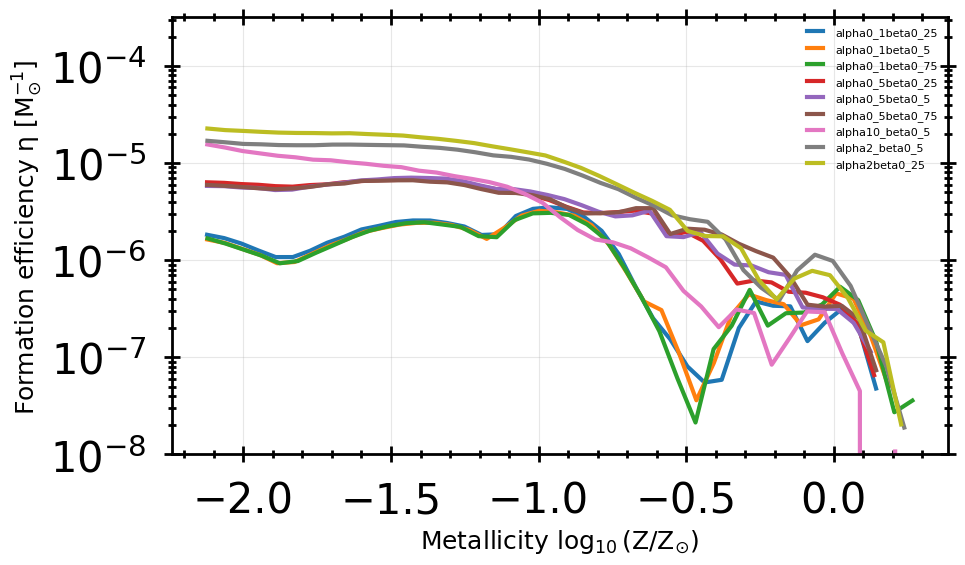

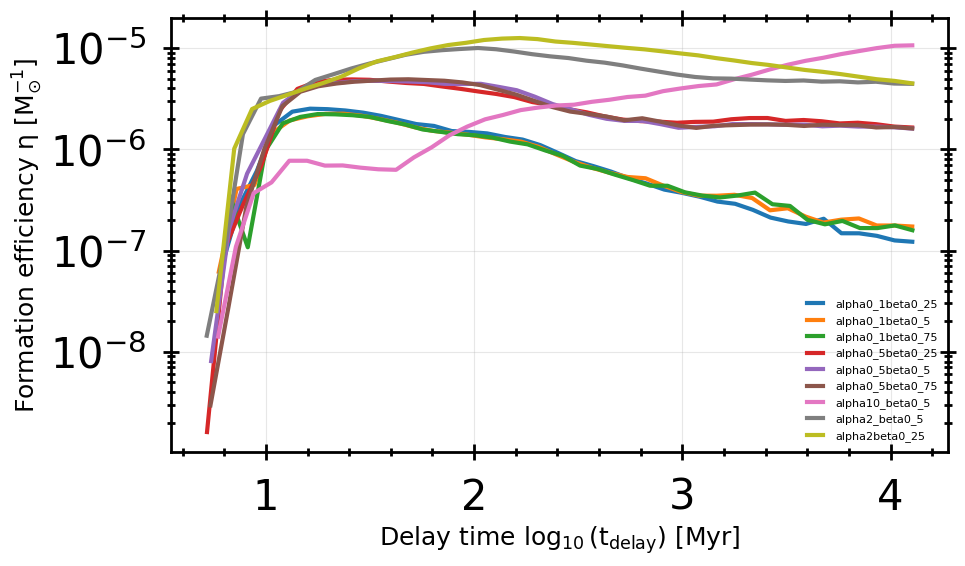

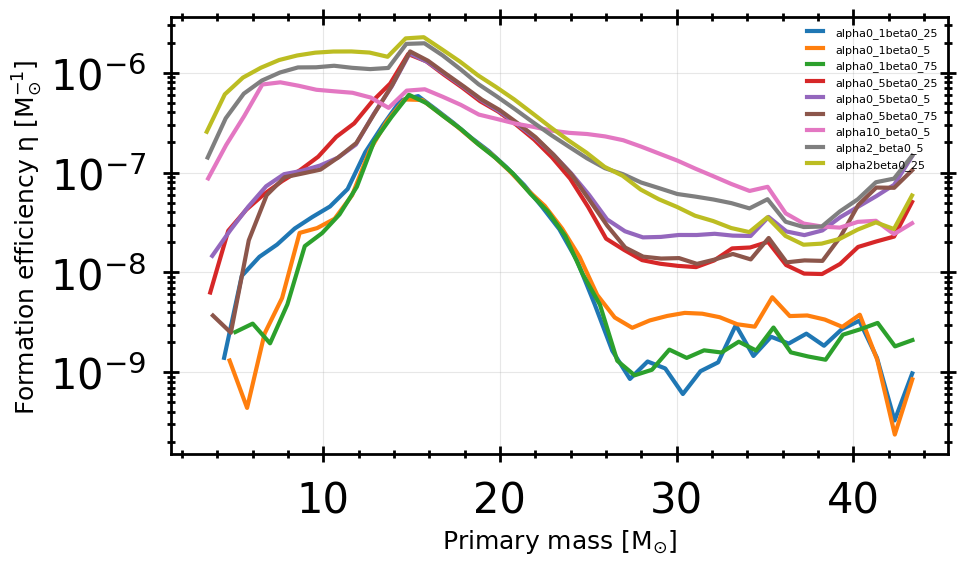

In [35]:


# Assuming you have the GROWL catalog from the previous artifact
growl_catalog = build_growl_catalog()

# Process multiple Boesky24 models
datasets_to_process = ['alpha0_1beta0_25', 'alpha0_1beta0_5', 'alpha0_1beta0_75', 'alpha0_5beta0_25', 'alpha0_5beta0_5', 'alpha0_5beta0_75', 'alpha10_beta0_5'\
                      , 'alpha10_beta0_75', 'alpha2_beta0_5', 'alpha2beta0_25']  

boesky_data = process_multiple_models(growl_catalog, 'Boesky24', datasets_to_process, 
                                      dco_type='BBH', pessimistic= True, merges_hubble=True, no_RLOF_post_CE=True)

# Create plots
plotter = COMPASPlotter()
fig1 = plotter.plot_formation_efficiency_vs_metallicity(boesky_data)
fig2 = plotter.plot_formation_efficiency_vs_delay_time(boesky_data)
fig3 = plotter.plot_mass_distribution(boesky_data, mass_type='primary')

plt.show()



Processing Boesky24/alpha0_1beta0_25...
  Found 1649874 BBH systems
Processing Boesky24/alpha0_1beta0_5...
  Found 1331908 BBH systems
Processing Boesky24/alpha0_1beta0_75...
  Found 1011769 BBH systems
Processing Boesky24/alpha0_5beta0_25...
  Found 3871867 BBH systems
Processing Boesky24/alpha0_5beta0_5...
  Found 3353619 BBH systems
Processing Boesky24/alpha0_5beta0_75...
  Found 2682498 BBH systems
Processing Boesky24/alpha10_beta0_5...
  Found 2825010 BBH systems
Error processing Boesky24/alpha10_beta0_75: 'alpha10_beta0_75'
Processing Boesky24/alpha2_beta0_5...
  Found 3568920 BBH systems
Processing Boesky24/alpha2beta0_25...
  Found 5072599 BBH systems


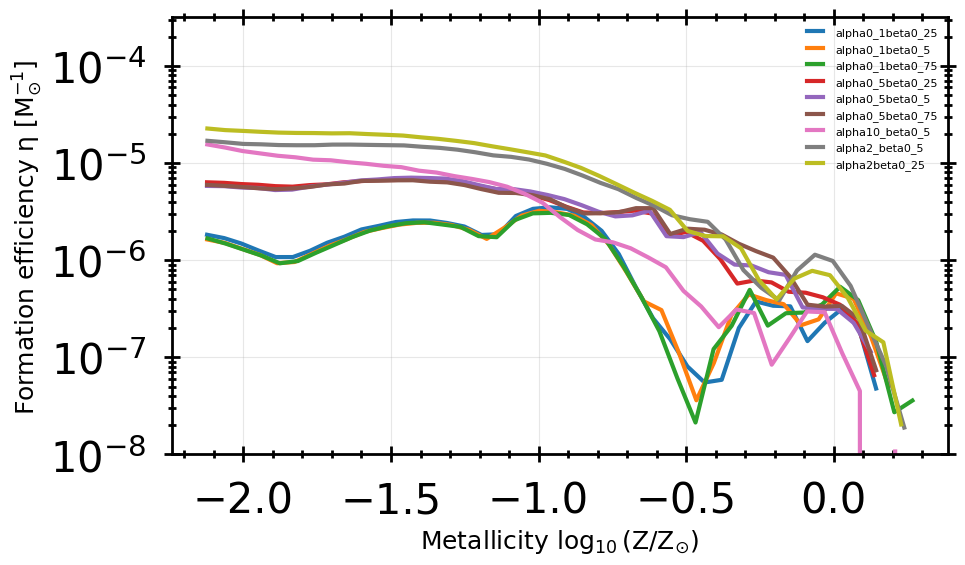

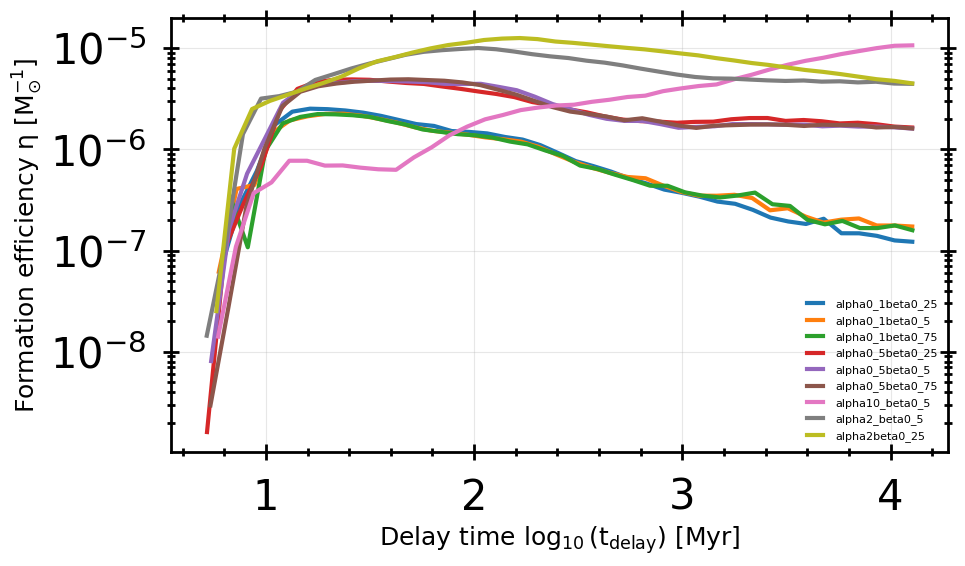

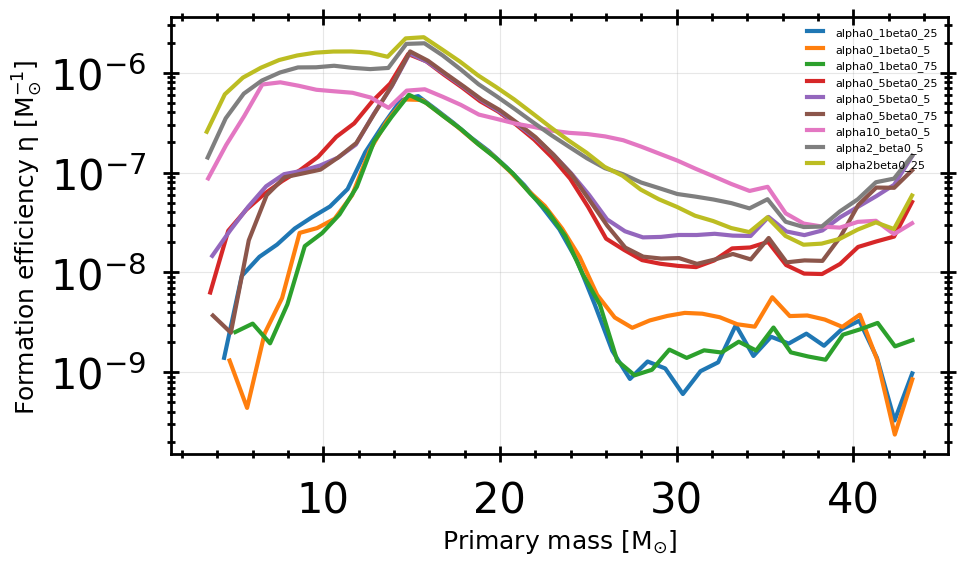

In [39]:

# Example usage
# if __name__ == "__main__":
# Example of how to use the classes

# Assuming you have the GROWL catalog from the previous artifact
growl_catalog = build_growl_catalog()

# Process multiple Boesky24 models
datasets_to_process = ['alpha0_1beta0_25', 'alpha0_1beta0_5', 'alpha0_1beta0_75', 'alpha0_5beta0_25', 'alpha0_5beta0_5', 'alpha0_5beta0_75', 'alpha10_beta0_5'\
                      , 'alpha10_beta0_75', 'alpha2_beta0_5', 'alpha2beta0_25']  

boesky_data = process_multiple_models(growl_catalog, 'Boesky24', datasets_to_process, 
            dco_type='BBH', pessimistic=False, merges_hubble=True, no_RLOF_post_CE=True)

# Create plots
plotter = COMPASPlotter()
fig1 = plotter.plot_formation_efficiency_vs_metallicity(boesky_data)
fig2 = plotter.plot_formation_efficiency_vs_delay_time(boesky_data)
fig3 = plotter.plot_mass_distribution(boesky_data, mass_type='primary')

plt.show()


In [71]:
import os
import h5py
import numpy as np
from typing import Dict, Any

def create_convolution_hdf5_from_dco_data(
    dco_data: Dict[str, Any], 
    base_output_dir: str,
    author_name: str = "Boesky24",
    output_filename: str = "bps_output.h5",
    create_separate_files: bool = True
) -> Dict[str, str]:
    """
    Create HDF5 file(s) for data from processed COMPAS DCO data.
    Creates directory structure: base_output_dir/author_name/dataset_name/
    
    Parameters
    ----------
    dco_data : Dict[str, DCOParameters]
        Dictionary with dataset names as keys and DCOParameters as values
        (e.g., result from process_multiple_models)
    base_output_dir : str
        Base directory (e.g., '/Volumes/GROWL/GROWL_bps_compact')
    author_name : str
        Author directory name (e.g., 'Boesky24')
    output_filename : str
        Name of the output HDF5 file
        
    Returns
    -------
    Dict[str, str]
        Dictionary mapping dataset names to their output file paths
    """
    
    created_files = {}

    # Create single file with multiple groups
    output_dir = os.path.join(base_output_dir, author_name)
    os.makedirs(output_dir, exist_ok=True)

    output_hdf5_filename = os.path.join(output_dir, output_filename)

    print(f"Creating combined file -> {output_hdf5_filename}")

    # Create the combined HDF5 file
    _create_combined_hdf5_file(output_hdf5_filename, dco_data)

    # All datasets point to the same file
    for dataset_name in dco_data.keys():
        created_files[dataset_name] = output_hdf5_filename
    
    return created_files


def _create_single_hdf5_file(filename: str, dataset_name: str, dco_params: Any):
    """
    Create a single HDF5 file for one dataset.
    
    Parameters
    ----------
    filename : str
        Full path to 
        the HDF5 file to create
    dataset_name : str
        Name of the dataset (used for metadata)
    dco_params : DCOParameters
        The DCO parameters object containing the data
    """
    
    # Prepare the data dictionary with the required properties
    data_dict = {
        "delay_time": dco_params.delay_times,
        "metallicity": dco_params.metallicities,
        "number_per_solar_mass_values": dco_params.formation_efficiencies,
        "mass_1": dco_params.primary_masses,  # m1
        "mass_2": dco_params.secondary_masses,  # m2
    }
    
    
    with h5py.File(filename, 'w') as f:
        # Add dataset metadata as attributes
        f.attrs['dataset_name'] = dataset_name
        f.attrs['creation_date'] = np.string_(str(np.datetime64('now')))
        f.attrs['description'] = f'DCO parameters for {dataset_name}'
        
        # Save each data array as a dataset
        for key, data in data_dict.items():
            # Convert to numpy array if not already
            data_array = np.asarray(data)
            
            # Create dataset with compression
            dataset = f.create_dataset(
                key, 
                data=data_array,
                compression='gzip',
                compression_opts=9,
                shuffle=True,
                fletcher32=True
            )
            
            # Add some metadata to each dataset
            dataset.attrs['description'] = _get_description(key)
            dataset.attrs['units'] = _get_units(key)
    
    print(f"  Created HDF5 file: {filename}")
    print(f"  Contains {len(data_dict)} datasets with {len(next(iter(data_dict.values())))} entries each")


def _create_combined_hdf5_file(filename: str, dco_data: Dict[str, Any]):
    """
    Create a single HDF5 file containing multiple datasets as groups.
    
    Parameters
    ----------
    filename : str
        Full path to the HDF5 file to create
    dco_data : Dict[str, DCOParameters]
        Dictionary of all DCO datasets
    """
    
    with h5py.File(filename, 'w') as f:
        # Add file-level metadata
        f.attrs['creation_date'] = np.string_(str(np.datetime64('now')))
        f.attrs['description'] = 'Combined DCO parameters file'
        f.attrs['num_datasets'] = len(dco_data)
        
        for dataset_name, dco_params in dco_data.items():
            print(f"  Adding dataset: {dataset_name}")
            
            # Create a group for this dataset
            group = f.create_group(dataset_name)
            group.attrs['dataset_name'] = dataset_name
            group.attrs['description'] = f'DCO parameters for {dataset_name}'
            
            # Prepare the data dictionary
            data_dict = {
                "delay_time": dco_params.delay_times,
                "metallicity": dco_params.metallicities,
                "number_per_solar_mass_values": dco_params.formation_efficiencies,
                "mass_1": dco_params.primary_masses,  # m1
                "mass_2": dco_params.secondary_masses,  # m2
            }
            

            
            # Save each data array as a dataset within the group
            for key, data in data_dict.items():
                data_array = np.asarray(data)
                
                dataset = group.create_dataset(
                    key,
                    data=data_array,
                    compression='gzip',
                    compression_opts=9,
                    shuffle=True,
                    fletcher32=True
                )
                
                dataset.attrs['description'] = _get_description(key)
                dataset.attrs['units'] = _get_units(key)
    
    print(f"  Created combined HDF5 file: {filename}")
    total_entries = sum(len(dco_params.delay_times) for dco_params in dco_data.values())
    print(f"  Contains {len(dco_data)} datasets with {total_entries} total entries")


def _get_description(key: str) -> str:
    """Get human-readable description for each data field."""
    descriptions = {
        "delay_time": "Time delay from formation to merger",
        "metallicity": "Stellar metallicity",
        "number_per_solar_mass_values": "Formation efficiency per solar mass",
        "mass_1": "Primary mass (more massive component)",
        "mass_2": "Secondary mass (less massive component)",
        "ones": "Column of ones for convolution purposes"
    }
    return descriptions.get(key, f"Data for {key}")


def _get_units(key: str) -> str:
    """Get units for each data field."""
    units = {
        "delay_time": "Myr",
        "metallicity": "dimensionless",
        "number_per_solar_mass_values": "per solar mass",
        "mass_1": "solar masses",
        "mass_2": "solar masses",
        "ones": "dimensionless"
    }
    return units.get(key, "unknown")






In [74]:


# import os
# import h5py
# import numpy as np
# from typing import Dict, Any

# def create_convolution_hdf5_from_dco_data(
#     dco_data: Dict[str, Any], 
#     base_output_dir: str,
#     author_name: str = "Boesky24",
#     output_filename: str = "bps_output.h5",
#     create_separate_files: bool = True
# ) -> Dict[str, str]:
#     """
#     Create HDF5 file(s) for data from processed COMPAS DCO data.
#     Creates directory structure: base_output_dir/author_name/dataset_name/
    
#     Parameters
#     ----------
#     dco_data : Dict[str, DCOParameters]
#         Dictionary with dataset names as keys and DCOParameters as values
#         (e.g., result from process_multiple_models)
#     base_output_dir : str
#         Base directory (e.g., '/Volumes/GROWL/GROWL_bps_compact')
#     author_name : str
#         Author directory name (e.g., 'Boesky24')
#     output_filename : str
#         Name of the output HDF5 file
        
#     Returns
#     -------
#     Dict[str, str]
#         Dictionary mapping dataset names to their output file paths
#     """
    
#     created_files = {}

#     # Create single file with multiple groups
#     output_dir = os.path.join(base_output_dir, author_name)
#     os.makedirs(output_dir, exist_ok=True)

#     output_hdf5_filename = os.path.join(output_dir, output_filename)

#     print(f"Creating combined file -> {output_hdf5_filename}")

#     # Create the combined HDF5 file
#     _create_combined_hdf5_file(output_hdf5_filename, dco_data)

#     # All datasets point to the same file
#     for dataset_name in dco_data.keys():
#         created_files[dataset_name] = output_hdf5_filename
    
#     return created_files


# def _create_single_hdf5_file(filename: str, dataset_name: str, dco_params: Any):
#     """
#     Create a single HDF5 file for one dataset.
    
#     Parameters
#     ----------
#     filename : str
#         Full path to 
#         the HDF5 file to create
#     dataset_name : str
#         Name of the dataset (used for metadata)
#     dco_params : DCOParameters
#         The DCO parameters object containing the data
#     """
    
#     # Prepare the data dictionary with the required properties
#     data_dict = {
#         "delay_time": dco_params.delay_times,
#         "metallicity": dco_params.metallicities,
#         "number_per_solar_mass_values": dco_params.formation_efficiencies,
#         "mass_1": dco_params.primary_masses,  # m1
#         "mass_2": dco_params.secondary_masses,  # m2
#     }
    
    
#     with h5py.File(filename, 'w') as f:
#         # Add dataset metadata as attributes
#         f.attrs['dataset_name'] = dataset_name
#         f.attrs['creation_date'] = np.string_(str(np.datetime64('now')))
#         f.attrs['description'] = f'DCO parameters for {dataset_name}'
        
#         # Save each data array as a dataset
#         for key, data in data_dict.items():
#             # Convert to numpy array if not already
#             data_array = np.asarray(data)
            
#             # Create dataset with compression
#             dataset = f.create_dataset(
#                 key, 
#                 data=data_array,
#                 compression='gzip',
#                 compression_opts=9,
#                 shuffle=True,
#                 fletcher32=True
#             )
            
#             # Add some metadata to each dataset
#             dataset.attrs['description'] = _get_description(key)
#             dataset.attrs['units'] = _get_units(key)
    
#     print(f"  Created HDF5 file: {filename}")
#     print(f"  Contains {len(data_dict)} datasets with {len(next(iter(data_dict.values())))} entries each")


# def _create_combined_hdf5_file(filename: str, dco_data: Dict[str, Any]):
#     """
#     Create a single HDF5 file containing multiple datasets as groups.
    
#     Parameters
#     ----------
#     filename : str
#         Full path to the HDF5 file to create
#     dco_data : Dict[str, DCOParameters]
#         Dictionary of all DCO datasets
#     """
    
#     with h5py.File(filename, 'w') as f:
#         # Add file-level metadata
#         f.attrs['creation_date'] = np.string_(str(np.datetime64('now')))
#         f.attrs['description'] = 'Combined DCO parameters file'
#         f.attrs['num_datasets'] = len(dco_data)
        
#         for dataset_name, dco_params in dco_data.items():
#             print(f"  Adding dataset: {dataset_name}")
            
#             # Create a group for this dataset
#             group = f.create_group(dataset_name)
#             group.attrs['dataset_name'] = dataset_name
#             group.attrs['description'] = f'DCO parameters for {dataset_name}'
            
#             # Prepare the data dictionary
#             data_dict = {
#                 "delay_time": dco_params.delay_times,
#                 "metallicity": dco_params.metallicities,
#                 "number_per_solar_mass_values": dco_params.formation_efficiencies,
#                 "mass_1": dco_params.primary_masses,  # m1
#                 "mass_2": dco_params.secondary_masses,  # m2
#             }
            

            
#             # Save each data array as a dataset within the group
#             for key, data in data_dict.items():
#                 data_array = np.asarray(data)
                
#                 dataset = group.create_dataset(
#                     key,
#                     data=data_array,
#                     compression='gzip',
#                     compression_opts=9,
#                     shuffle=True,
#                     fletcher32=True
#                 )
                
#                 dataset.attrs['description'] = _get_description(key)
#                 dataset.attrs['units'] = _get_units(key)
    
#     print(f"  Created combined HDF5 file: {filename}")
#     total_entries = sum(len(dco_params.delay_times) for dco_params in dco_data.values())
#     print(f"  Contains {len(dco_data)} datasets with {total_entries} total entries")


# def _get_description(key: str) -> str:
#     """Get human-readable description for each data field."""
#     descriptions = {
#         "delay_time": "Time delay from formation to merger",
#         "metallicity": "Stellar metallicity",
#         "number_per_solar_mass_values": "Formation efficiency per solar mass",
#         "mass_1": "Primary mass (more massive component)",
#         "mass_2": "Secondary mass (less massive component)",
#         "ones": "Column of ones for convolution purposes"
#     }
#     return descriptions.get(key, f"Data for {key}")


# def _get_units(key: str) -> str:
#     """Get units for each data field."""
#     units = {
#         "delay_time": "Myr",
#         "metallicity": "dimensionless",
#         "number_per_solar_mass_values": "per solar mass",
#         "mass_1": "solar masses",
#         "mass_2": "solar masses",
#         "ones": "dimensionless"
#     }
#     return units.get(key, "unknown")







# # Assuming you have the GROWL catalog from the previous artifact
# growl_catalog = build_growl_catalog()

# base_output_dir = "/Volumes/GROWL/GROWL_bps_compact"
# author_name = "Boesky24"

# # Process multiple Boesky24 models
# datasets_to_process = ['alpha0_1beta0_25']  

# dco_data = process_multiple_models(growl_catalog, 'Boesky24', datasets_to_process, 
#                                       dco_type='BBH', pessimistic= True, merges_hubble=True, no_RLOF_post_CE=True)


# # Option 1: Create separate files for each dataset
# # created_files_separate = create_convolution_hdf5_from_dco_data(
# #     dco_data=dco_data,
# #     base_output_dir=base_output_dir,
# #     author_name=author_name,
# #     output_filename="bps_output.h5",
# #     create_separate_files=True
# # )

# # Option 2: Create single combined file
# created_files_combined = create_convolution_hdf5_from_dco_data(
#     dco_data=dco_data,
#     base_output_dir=base_output_dir,
#     author_name=author_name,
#     output_filename="all_dco_params.h5",
#     create_separate_files=False
# )
    
# #     return created_files_separate, created_files_combined




Processing Boesky24/alpha0_1beta0_25...
  Found 1649874 BBH systems
Creating combined file -> /Volumes/GROWL/GROWL_bps_compact/Boesky24/all_dco_params.h5
  Adding dataset: alpha0_1beta0_25
  Created combined HDF5 file: /Volumes/GROWL/GROWL_bps_compact/Boesky24/all_dco_params.h5
  Contains 1 datasets with 1649874 total entries


In [75]:
import os
import h5py
import numpy as np
from typing import Dict, Any

def create_convolution_hdf5_from_dco_data(
    dco_data: Dict[str, Any], 
    base_output_dir: str,
    author_name: str = "Boesky24",
    output_filename: str = "bps_output.h5",
    create_separate_files: bool = True
) -> Dict[str, str]:
    """
    Create HDF5 file(s) for data from processed COMPAS DCO data.
    Creates directory structure: base_output_dir/author_name/dataset_name/
    
    Parameters
    ----------
    dco_data : Dict[str, DCOParameters]
        Dictionary with dataset names as keys and DCOParameters as values
        (e.g., result from process_multiple_models)
    base_output_dir : str
        Base directory (e.g., '/Volumes/GROWL/GROWL_bps_compact')
    author_name : str
        Author directory name (e.g., 'Boesky24')
    output_filename : str
        Name of the output HDF5 file
        
    Returns
    -------
    Dict[str, str]
        Dictionary mapping dataset names to their output file paths
    """
    
    created_files = {}
    
    if create_separate_files:
        # Create separate files for each dataset
        for dataset_name, dco_params in dco_data.items():
            # Create directory structure: base_output_dir/author_name/dataset_name/
            output_dir = os.path.join(base_output_dir, author_name, dataset_name)
            os.makedirs(output_dir, exist_ok=True)
            
            print(f"Processing {dataset_name} -> {output_dir}")
            
            # Full path to output file
            output_hdf5_filename = os.path.join(output_dir, output_filename)
            
            # Create the HDF5 file for this dataset
            _create_single_hdf5_file(output_hdf5_filename, dataset_name, dco_params)
            
            created_files[dataset_name] = output_hdf5_filename
            
    else:
        # Create single file with multiple groups
        output_dir = os.path.join(base_output_dir, author_name)
        os.makedirs(output_dir, exist_ok=True)
        
        output_hdf5_filename = os.path.join(output_dir, output_filename)
        
        print(f"Creating combined file -> {output_hdf5_filename}")
        
        # Create the combined HDF5 file
        _create_combined_hdf5_file(output_hdf5_filename, dco_data)
        
        # All datasets point to the same file
        for dataset_name in dco_data.keys():
            created_files[dataset_name] = output_hdf5_filename
    
    return created_files


def _create_single_hdf5_file(filename: str, dataset_name: str, dco_params: Any):
    """
    Create a single HDF5 file for one dataset.
    
    Parameters
    ----------
    filename : str
        Full path to the HDF5 file to create
    dataset_name : str
        Name of the dataset (used for metadata)
    dco_params : DCOParameters
        The DCO parameters object containing the data
    """
    
    # Prepare the data dictionary with the required properties
    data_dict = {
        "delay_time": dco_params.delay_times,
        "metallicity": dco_params.metallicities,
        "number_per_solar_mass_values": dco_params.formation_efficiencies,
        "mass_1": dco_params.primary_masses,  # m1
        "mass_2": dco_params.secondary_masses,  # m2
    }
    
    with h5py.File(filename, 'w') as f:
        # Add dataset metadata as attributes
        f.attrs['dataset_name'] = dataset_name
        f.attrs['creation_date'] = np.string_(str(np.datetime64('now')))
        f.attrs['description'] = f'DCO parameters for {dataset_name}'
        
        # Save each data array as a dataset
        for key, data in data_dict.items():
            # Convert to numpy array if not already
            data_array = np.asarray(data)
            
            # Create dataset with compression
            dataset = f.create_dataset(
                key, 
                data=data_array,
                compression='gzip',
                compression_opts=9,
                shuffle=True,
                fletcher32=True
            )
            
            # Add some metadata to each dataset
            dataset.attrs['description'] = _get_description(key)
            dataset.attrs['units'] = _get_units(key)
    
    print(f"  Created HDF5 file: {filename}")
    print(f"  Contains {len(data_dict)} datasets with {len(next(iter(data_dict.values())))} entries each")


def _create_combined_hdf5_file(filename: str, dco_data: Dict[str, Any]):
    """
    Create a single HDF5 file containing multiple datasets as groups.
    
    Parameters
    ----------
    filename : str
        Full path to the HDF5 file to create
    dco_data : Dict[str, DCOParameters]
        Dictionary of all DCO datasets
    """
    
    with h5py.File(filename, 'w') as f:
        # Add file-level metadata
        f.attrs['creation_date'] = np.string_(str(np.datetime64('now')))
        f.attrs['description'] = 'Combined DCO parameters file'
        f.attrs['num_datasets'] = len(dco_data)
        
        for dataset_name, dco_params in dco_data.items():
            print(f"  Adding dataset: {dataset_name}")
            
            # Create a group for this dataset
            group = f.create_group(dataset_name)
            group.attrs['dataset_name'] = dataset_name
            group.attrs['description'] = f'DCO parameters for {dataset_name}'
            
            # Prepare the data dictionary
            data_dict = {
                "delay_time": dco_params.delay_times,
                "metallicity": dco_params.metallicities,
                "number_per_solar_mass_values": dco_params.formation_efficiencies,
                "mass_1": dco_params.primary_masses,  # m1
                "mass_2": dco_params.secondary_masses,  # m2
            }
            
            # Save each data array as a dataset within the group
            for key, data in data_dict.items():
                data_array = np.asarray(data)
                
                dataset = group.create_dataset(
                    key,
                    data=data_array,
                    compression='gzip',
                    compression_opts=9,
                    shuffle=True,
                    fletcher32=True
                )
                
                dataset.attrs['description'] = _get_description(key)
                dataset.attrs['units'] = _get_units(key)
    
    print(f"  Created combined HDF5 file: {filename}")
    total_entries = sum(len(dco_params.delay_times) for dco_params in dco_data.values())
    print(f"  Contains {len(dco_data)} datasets with {total_entries} total entries")


def _get_description(key: str) -> str:
    """Get human-readable description for each data field."""
    descriptions = {
        "delay_time": "Time delay from formation to merger",
        "metallicity": "Stellar metallicity",
        "number_per_solar_mass_values": "Formation efficiency per solar mass",
        "mass_1": "Primary mass (more massive component)",
        "mass_2": "Secondary mass (less massive component)",
        "ones": "Column of ones for convolution purposes"
    }
    return descriptions.get(key, f"Data for {key}")


def _get_units(key: str) -> str:
    """Get units for each data field."""
    units = {
        "delay_time": "Myr",
        "metallicity": "dimensionless",
        "number_per_solar_mass_values": "per solar mass",
        "mass_1": "solar masses",
        "mass_2": "solar masses",
        "ones": "dimensionless"
    }
    return units.get(key, "unknown")


# Example usage for your specific case
base_output_dir = "/Volumes/GROWL/GROWL_bps_compact"
author_name = "Boesky24"

# Process multiple Boesky24 models
datasets_to_process = ['alpha0_1beta0_25']  

# Assuming you have dco_data from process_multiple_models
# dco_data = process_multiple_models(growl_catalog, 'Boesky24', datasets_to_process, 
#                                   dco_type='BBH', pessimistic=True, merges_hubble=True, no_RLOF_post_CE=True)

# Create separate files for each dataset in their own subdirectories
created_files_separate = create_convolution_hdf5_from_dco_data(
    dco_data=dco_data,
    base_output_dir=base_output_dir,
    author_name=author_name,
    output_filename="bps_output.h5",
    create_separate_files=True  # This will create /Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25/bps_output.h5
)

# If you want a combined file instead (in /Volumes/GROWL/GROWL_bps_compact/Boesky24/)
# created_files_combined = create_convolution_hdf5_from_dco_data(
#     dco_data=dco_data,
#     base_output_dir=base_output_dir,
#     author_name=author_name,
#     output_filename="all_dco_params.h5",
#     create_separate_files=False
# )

Processing alpha0_1beta0_25 -> /Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25
  Created HDF5 file: /Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25/bps_output.h5
  Contains 5 datasets with 1649874 entries each


In [81]:
path = '/Volumes/GROWL/GROWL_bps_compact/Boesky24/alpha0_1beta0_25/'
file_name = 'bps_output.h5'

full_path = path + file_name
fdata = h5.File(full_path, 'r')
dt = fdata['delay_time'][()]
print(dt)
units = fdata['delay_time'].attrs['units']
# Get the description too if you want
description = fdata['delay_time'].attrs['description']
print("Description:", description)

[  31.04574242   57.05327641 2311.47864168 ...   14.42014521   69.58218799
  415.63228291]
Description: Time delay from formation to merger


In [82]:
print(units)

Myr


In [10]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import astropy.units as u
from typing import Union, Dict, List, Tuple, Optional
from dataclasses import dataclass
from pathlib import Path

import os
import json
import pkg_resources
import copy
import logging
import h5py

import pandas as pd
import numpy as np
import astropy.units as u



TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try' # #temp_dir("notebooks", "notebook_example_GW_merger_rate_density", clean_path=True)
VERBOSITY = 0

# The flag below allows the user to run this notebook without the full data or starformation rate.
FULL_VERSION = os.getenv("EXAMPLE_USECASE_GW_FULL_VERSION", False)

import matplotlib as plt

import os, copy, h5py
import astropy.units as u
import numpy as np
import pandas as pd

import sys

# sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve')
sys.path.insert(0, '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve')
from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
from syntheticstellarpopconvolve.general_functions import generate_boilerplate_outputfile, extract_unit_dict, temp_dir

from syntheticstellarpopconvolve.starformation_rate_distributions import starformation_rate_distribution_vanSon2023
from syntheticstellarpopconvolve.metallicity_distributions import metallicity_distribution_vanSon2022
from syntheticstellarpopconvolve.general_functions import calculate_bincenters, calculate_bin_edges
from syntheticstellarpopconvolve.SFR_dict_plotting_routines import plot_sfr_dict

from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
from syntheticstellarpopconvolve.general_functions import temp_dir, generate_boilerplate_outputfile


## set up SFR  - same for all data sets 

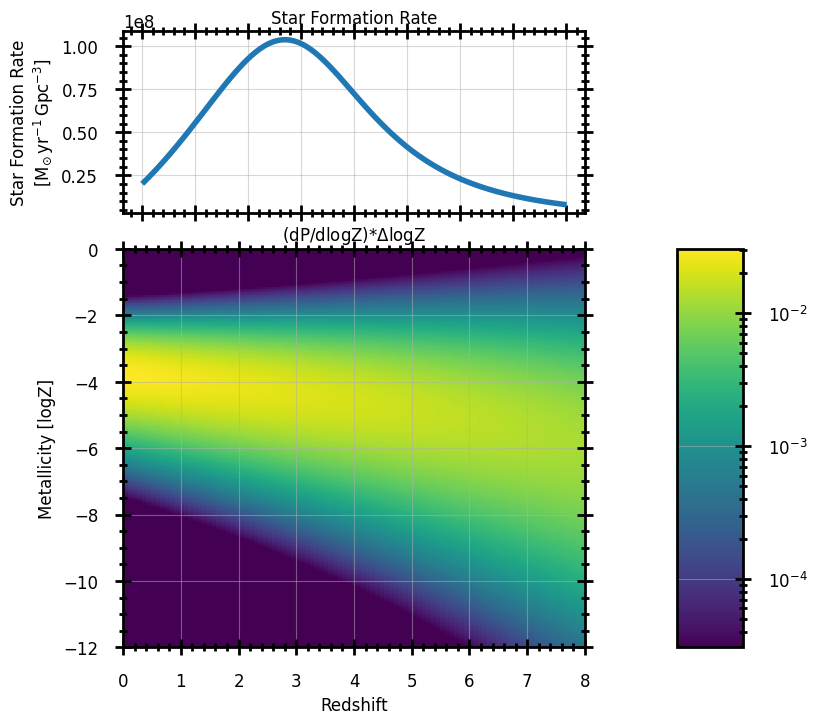

In [11]:


# Set up redshift bin info
num_redshift_bins = 100
redshift_bin_edges = np.linspace(0, 8, num_redshift_bins); redshift_bin_centers = calculate_bincenters(redshift_bin_edges)

# Set up metallicity bin info
num_metallicity_bins = 200
log_metallicity_bin_edges = np.linspace(-12, 0, num_metallicity_bins); log_metallicity_bin_centers = calculate_bincenters(log_metallicity_bin_edges)

#
sfr = starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)

#
dpdlogZ = metallicity_distribution_vanSon2022(
    log_metallicity_centers=log_metallicity_bin_centers,
    redshifts=redshift_bin_centers,
)

high_res_sfr_dict = {
    "redshift_bin_edges": redshift_bin_edges,
    "starformation_rate_array": sfr,
    "metallicity_bin_edges": log_metallicity_bin_edges,
    "metallicity_distribution_array": dpdlogZ,
}

axis_dict = plot_sfr_dict(
    high_res_sfr_dict,
    time_type="redshift",
    metallicity_string="logZ",
    metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
    metallicity_distribution_multiply_by_sfr=False,
    metallicity_distribution_scale="log10",
    metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
    return_axis_dict=True,
    figsize=(8,8),
    fontsize=12,
)



In [ ]:
TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")




generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "metallicity": metallicity_BBHs,
    "number_per_solar_mass_values": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")





# Assign filenames
# output_hdf5_filename = os.path.join(TMP_DIR, "output_hdf5.h5")
# generate_boilerplate_outputfile(output_hdf5_filename)

# # store the data frame in the hdf5file
# example_usecase_GW_events_data.to_hdf(output_hdf5_filename, key="input_data/example_GW_merger_rate_density")

# print(example_usecase_GW_events_data.columns)

# Some general configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config['logger'].setLevel(logging.WARNING)
convolution_config["output_filename"] = output_hdf5_filename
convolution_config["tmp_dir"] = TMP_DIR
convolution_config["redshift_interpolator_data_output_filename"] = os.path.join(
    TMP_DIR, "interpolator_dict.p"
)
convolution_config["multiply_by_time_binsize"] = False
convolution_config["time_type"] = "redshift"

convolution_config["output_filename"] = output_hdf5_filename

# convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "convolution_type": "integrate",
        "input_data_name": "example",
        "output_data_name": "intrinsic",
        "data_column_dict": {
            # required
            "normalized_yield": "number_per_solar_mass_values",
            "delay_time": {"column_name": "delay_time", "unit": u.Myr},
            "metallicity": "metallicity"
        },
    },
]

# configure the target convolution times. In this case we only want to model the rate at redshift ~0, so its a simple set up
convolution_config["convolution_redshift_bin_edges"] = np.array([0, 0.25])

# store
convolution_config["SFR_info"] = sfr_dict



In [4]:
# import numpy as np
# import h5py as h5
# import matplotlib.pyplot as plt
# import astropy.units as u
# from typing import Union, Dict, List, Tuple, Optional
# from dataclasses import dataclass
# from pathlib import Path

# import os
# import json
# import pkg_resources
# import copy
# import logging
# import h5py

# import pandas as pd
# import numpy as np
# import astropy.units as u



# TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try' # #temp_dir("notebooks", "notebook_example_GW_merger_rate_density", clean_path=True)
# VERBOSITY = 0

# # The flag below allows the user to run this notebook without the full data or starformation rate.
# FULL_VERSION = os.getenv("EXAMPLE_USECASE_GW_FULL_VERSION", False)

# import matplotlib as plt

# import os, copy, h5py
# import astropy.units as u
# import numpy as np
# import pandas as pd

# import sys

# # sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve')
# sys.path.insert(0, '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve')
# from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
# from syntheticstellarpopconvolve.general_functions import generate_boilerplate_outputfile, extract_unit_dict, temp_dir

# from syntheticstellarpopconvolve.starformation_rate_distributions import starformation_rate_distribution_vanSon2023
# from syntheticstellarpopconvolve.metallicity_distributions import metallicity_distribution_vanSon2022
# from syntheticstellarpopconvolve.general_functions import calculate_bincenters, calculate_bin_edges
# from syntheticstellarpopconvolve.SFR_dict_plotting_routines import plot_sfr_dict

# from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
# from syntheticstellarpopconvolve.general_functions import temp_dir, generate_boilerplate_outputfile


# @dataclass
# class DCOParameters:
#     """Container for Double Compact Object parameters"""
#     metallicities: np.ndarray
#     delay_times: np.ndarray
#     formation_efficiencies: np.ndarray
#     primary_masses: np.ndarray
#     secondary_masses: np.ndarray
#     chirp_masses: np.ndarray
#     mixture_weights: np.ndarray
#     total_mass_evolved: float
#     n_systems: int

# class COMPASDataProcessor:
#     """Class to process COMPAS HDF5 files and extract DCO properties"""
    
#     def __init__(self, solar_metallicity: float = 0.0142):
#         self.solar_metallicity = solar_metallicity
        
#     def analytical_star_forming_mass_per_binary_using_kroupa_imf(
#         self, m1_min: float, m1_max: float, m2_min: float, 
#         fbin: float = 1., imf_mass_bounds: List[float] = [0.01, 0.08, 0.5, 200]
#     ) -> float:
#         """
#         Analytical computation of the mass of stars formed per binary star formed
#         using the Kroupa IMF.
        
#         Parameters
#         ----------
#         m1_min, m1_max : float
#             Primary mass range [Msun]
#         m2_min : float  
#             Minimum secondary mass [Msun]
#         fbin : float
#             Binary fraction
#         imf_mass_bounds : list
#             IMF mass boundaries [Msun]
            
#         Returns
#         -------
#         float
#             Mass represented by each binary [Msun]
#         """
#         m1, m2, m3, m4 = imf_mass_bounds
        
#         if m1_min < m3:
#             raise ValueError(f"This analytical derivation requires IMF break m3 < m1_min ({m3} !< {m1_min})")
        
#         alpha = (-(m4**(-1.3) - m3**(-1.3))/1.3 - 
#                 (m3**(-0.3) - m2**(-0.3))/(m3*0.3) + 
#                 (m2**0.7 - m1**0.7)/(m2*m3*0.7))**(-1)
        
#         # Average mass of stars
#         m_avg = alpha * (-(m4**(-0.3) - m3**(-0.3))/0.3 + 
#                         (m3**0.7 - m2**0.7)/(m3*0.7) + 
#                         (m2**1.7 - m1**1.7)/(m2*m3*1.7))
        
#         # Fraction of binaries that COMPAS simulates
#         fint = (-alpha / 1.3 * (m1_max**(-1.3) - m1_min**(-1.3)) + 
#                 alpha * m2_min / 2.3 * (m1_max**(-2.3) - m1_min**(-2.3)))
        
#         # Mass represented by each binary
#         m_rep = (1/fint) * m_avg * (1.5 + (1-fbin)/fbin)
        
#         return m_rep
    
#     def get_dco_mask(self, fdata: h5.File, dco_type: str = 'BBH') -> np.ndarray:
#         """
#         Create mask for Double Compact Objects of specified type.
        
#         Parameters
#         ----------
#         fdata : h5py.File
#             COMPAS HDF5 file
#         dco_type : str
#             Type of DCO: 'BBH', 'BNS', 'NSBH'
            
#         Returns
#         -------
#         np.ndarray
#             Boolean mask for DCOs
#         """
#         stellar_type1 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(1)'][()]
#         stellar_type2 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(2)'][()]
#         merges_hubble = fdata['BSE_Double_Compact_Objects']['Merges_Hubble_Time'][()]
        
#         # Pessimistic CE mask
#         optimistic_ce = fdata['BSE_Common_Envelopes']['Optimistic_CE'][()]
#         pessimistic_ce_mask = np.in1d(
#             fdata['BSE_Double_Compact_Objects']['SEED'][()], 
#             fdata['BSE_Common_Envelopes']['SEED'][()][optimistic_ce == 0]
#         )
        
#         # Define stellar type mappings
#         type_map = {'NS': 13, 'BH': 14}
        
#         if dco_type == 'BBH':
#             type_mask = (stellar_type1 == type_map['BH']) & (stellar_type2 == type_map['BH'])
#         elif dco_type == 'BNS':
#             type_mask = (stellar_type1 == type_map['NS']) & (stellar_type2 == type_map['NS'])
#         elif dco_type == 'NSBH':
#             type_mask = ((stellar_type1 == type_map['NS']) & (stellar_type2 == type_map['BH'])) | \
#                        ((stellar_type1 == type_map['BH']) & (stellar_type2 == type_map['NS']))
#         else:
#             raise ValueError(f"Unknown DCO type: {dco_type}")
            
#         return type_mask & (merges_hubble == True) & (pessimistic_ce_mask == True)
    
#     def get_primary_secondary(self, m1: np.ndarray, m2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
#         """
#         Return (primary, secondary) where primary >= secondary element-wise.
        
#         Parameters
#         ----------
#         m1, m2 : np.ndarray
#             Component masses
            
#         Returns
#         -------
#         primary, secondary : np.ndarray
#             Ordered masses
#         """
#         primary = np.maximum(m1, m2)
#         secondary = np.minimum(m1, m2)
#         return primary, secondary
    
#     def chirp_mass(self, m1: np.ndarray, m2: np.ndarray) -> np.ndarray:
#         """
#         Compute chirp mass from component masses.
        
#         Parameters
#         ----------
#         m1, m2 : np.ndarray
#             Component masses [Msun]
            
#         Returns
#         -------
#         np.ndarray
#             Chirp masses [Msun]
#         """
#         return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)
    
#     def process_compas_file(self, file_path: str, dco_type: str = 'BBH') -> DCOParameters:
#         """
#         Process a COMPAS HDF5 file and extract DCO parameters.
        
#         Parameters
#         ----------
#         file_path : str
#             Path to COMPAS HDF5 file
#         dco_type : str
#             Type of DCO to extract
            
#         Returns
#         -------
#         DCOParameters
#             Container with all DCO properties
#         """
#         with h5.File(file_path, 'r') as fdata:
#             # Get simulation parameters
#             initial_mass_min = fdata['Run_Details']['initial-mass-min'][()][0]
#             initial_mass_max = fdata['Run_Details']['initial-mass-max'][()][0] 
#             minimum_secondary_mass = fdata['Run_Details']['minimum-secondary-mass'][()][0]
            
#             # Calculate mass representation
#             m_rep_per_binary = self.analytical_star_forming_mass_per_binary_using_kroupa_imf(
#                 m1_min=initial_mass_min, 
#                 m1_max=initial_mass_max,
#                 m2_min=minimum_secondary_mass, 
#                 fbin=1.0
#             )
            
#             n_binaries = len(fdata['BSE_System_Parameters']['SEED'][()])
#             total_mass_evolved = n_binaries * m_rep_per_binary
            
#             # Get DCO mask
#             dco_mask = self.get_dco_mask(fdata, dco_type)
#             n_dcos = np.sum(dco_mask)
            
#             if n_dcos == 0:
#                 print(f"Warning: No {dco_type} systems found in {file_path}")
#                 return None
            
#             # Get system parameters for DCOs
#             mask_sys_dcos = np.in1d(
#                 fdata['BSE_System_Parameters']['SEED'][()], 
#                 fdata['BSE_Double_Compact_Objects']['SEED'][()][dco_mask]
#             )
            
#             # Extract properties
#             metallicities = fdata['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()][mask_sys_dcos]
#             mixture_weights = fdata['BSE_Double_Compact_Objects']['mixture_weight'][()][dco_mask]
#             formation_efficiencies = mixture_weights / total_mass_evolved
            
#             delay_times = (fdata['BSE_Double_Compact_Objects']['Coalescence_Time'][()] + 
#                           fdata['BSE_Double_Compact_Objects']['Time'][()])[dco_mask]
            
#             # Masses
#             m1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()][dco_mask]
#             m2 = fdata['BSE_Double_Compact_Objects']['Mass(2)'][()][dco_mask]
#             primary_masses, secondary_masses = self.get_primary_secondary(m1, m2)
#             chirp_masses = self.chirp_mass(m1, m2)
            
#         return DCOParameters(
#             metallicities=metallicities,
#             delay_times=delay_times,
#             formation_efficiencies=formation_efficiencies,
#             primary_masses=primary_masses,
#             secondary_masses=secondary_masses,
#             chirp_masses=chirp_masses,
#             mixture_weights=mixture_weights,
#             total_mass_evolved=total_mass_evolved,
#             n_systems=n_dcos
#         )

# class COMPASPlotter:
#     """Class for creating plots from processed COMPAS data"""
    
#     def __init__(self, figsize: Tuple[int, int] = (10, 8), fontsize: int = 18):
#         self.figsize = figsize
#         self.fontsize = fontsize
#         plt.rcParams.update({'font.size': fontsize})
    
#     def plot_formation_efficiency_vs_metallicity(
#         self, 
#         data_dict: Dict[str, DCOParameters], 
#         solar_metallicity: float = 0.0142,
#         bins: int = 40,
#         save_path: Optional[str] = None
#     ) -> plt.Figure:
#         """
#         Plot formation efficiency vs metallicity for multiple models.
        
#         Parameters
#         ----------
#         data_dict : dict
#             Dictionary with model names as keys and DCOParameters as values
#         solar_metallicity : float
#             Solar metallicity value
#         bins : int
#             Number of histogram bins
#         save_path : str, optional
#             Path to save the figure
            
#         Returns
#         -------
#         plt.Figure
#             The figure object
#         """
#         fig, ax = plt.subplots(figsize=self.figsize)
        
#         for model_name, data in data_dict.items():
#             # Calculate histogram
#             log_z_zsun = np.log10(data.metallicities / solar_metallicity)
#             hist, bin_edges = np.histogram(
#                 log_z_zsun, 
#                 weights=data.formation_efficiencies, 
#                 bins=bins, 
#                 density=True
#             )
#             bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#             normalization = np.sum(data.formation_efficiencies)
            
#             ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
#         ax.set_yscale('log')
#         ax.set_ylim(10**-8, 10**-3.5)
#         ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
#         ax.set_xlabel(r'Metallicity $\log_{10}(Z/Z_{\odot})$', fontsize=self.fontsize)
#         ax.legend()
#         ax.grid(True, alpha=0.3)
        
#         plt.tight_layout()
        
#         if save_path:
#             fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
#         return fig
    
#     def plot_formation_efficiency_vs_delay_time(
#         self, 
#         data_dict: Dict[str, DCOParameters], 
#         bins: int = 40,
#         save_path: Optional[str] = None
#     ) -> plt.Figure:
#         """
#         Plot formation efficiency vs delay time for multiple models.
        
#         Parameters
#         ----------
#         data_dict : dict
#             Dictionary with model names as keys and DCOParameters as values
#         bins : int
#             Number of histogram bins
#         save_path : str, optional
#             Path to save the figure
            
#         Returns
#         -------
#         plt.Figure
#             The figure object
#         """
#         fig, ax = plt.subplots(figsize=self.figsize)
        
#         for model_name, data in data_dict.items():
#             # Calculate histogram
#             log_delay_times = np.log10(data.delay_times)
#             hist, bin_edges = np.histogram(
#                 log_delay_times, 
#                 weights=data.formation_efficiencies, 
#                 bins=bins, 
#                 density=True
#             )
#             bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#             normalization = np.sum(data.formation_efficiencies)
            
#             ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
#         ax.set_yscale('log')
#         ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
#         ax.set_xlabel(r'Delay time $\log_{10}(t_{\rm{delay}})$ [Myr]', fontsize=self.fontsize)
#         ax.legend()
#         ax.grid(True, alpha=0.3)
        
#         plt.tight_layout()
        
#         if save_path:
#             fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
#         return fig
    
#     def plot_mass_distribution(
#         self, 
#         data_dict: Dict[str, DCOParameters], 
#         mass_type: str = 'primary',
#         bins: int = 40,
#         save_path: Optional[str] = None
#     ) -> plt.Figure:
#         """
#         Plot mass distribution for multiple models.
        
#         Parameters
#         ----------
#         data_dict : dict
#             Dictionary with model names as keys and DCOParameters as values
#         mass_type : str
#             Type of mass: 'primary', 'secondary', 'chirp'
#         bins : int
#             Number of histogram bins
#         save_path : str, optional
#             Path to save the figure
            
#         Returns
#         -------
#         plt.Figure
#             The figure object
#         """
#         fig, ax = plt.subplots(figsize=self.figsize)
        
#         mass_attr_map = {
#             'primary': 'primary_masses',
#             'secondary': 'secondary_masses', 
#             'chirp': 'chirp_masses'
#         }
        
#         if mass_type not in mass_attr_map:
#             raise ValueError(f"Unknown mass type: {mass_type}")
        
#         for model_name, data in data_dict.items():
#             masses = getattr(data, mass_attr_map[mass_type])
            
#             # Calculate histogram
#             hist, bin_edges = np.histogram(
#                 masses, 
#                 weights=data.formation_efficiencies, 
#                 bins=bins, 
#                 density=True
#             )
#             bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#             normalization = np.sum(data.formation_efficiencies)
            
#             ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
#         ax.set_yscale('log')
#         ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
#         ax.set_xlabel(f'{mass_type.capitalize()} mass [$M_{{\\odot}}$]', fontsize=self.fontsize)
#         ax.legend()
#         ax.grid(True, alpha=0.3)
        
#         plt.tight_layout()
        
#         if save_path:
#             fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
#         return fig

# def process_multiple_models(
#     catalog: Dict, 
#     author: str, 
#     datasets: List[str], 
#     dco_type: str = 'BBH'
# ) -> Dict[str, DCOParameters]:
#     """
#     Process multiple COMPAS models for comparison.
    
#     Parameters
#     ----------
#     catalog : dict
#         GROWL catalog dictionary
#     author : str
#         Author name
#     datasets : list
#         List of dataset names to process
#     dco_type : str
#         Type of DCO to extract
        
#     Returns
#     -------
#     dict
#         Dictionary with dataset names as keys and DCOParameters as values
#     """
#     processor = COMPASDataProcessor()
#     results = {}
    
#     for dataset in datasets:
#         try:
#             file_path = catalog[author]['paths'][dataset] + catalog[author]['file_name']
#             print(f"Processing {author}/{dataset}...")
            
#             data = processor.process_compas_file(file_path, dco_type)
#             if data is not None:
#                 results[dataset] = data
#                 print(f"  Found {data.n_systems} {dco_type} systems")
#             else:
#                 print(f"  No {dco_type} systems found")
                
#         except Exception as e:
#             print(f"Error processing {author}/{dataset}: {e}")
#             continue
    
#     return results

# import os
# import copy
# import logging
# import pandas as pd
# import h5py

# class SFRManager:
#     """Class to manage Star Formation Rate and metallicity distributions"""
    
#     def __init__(self):
#         """Initialize SFR manager with required imports"""
#         try:
#             from syntheticstellarpopconvolve.general_functions import calculate_bin_edges, calculate_bincenters
#             from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import (
#                 metallicity_distribution_vanSon2022, starformation_rate_distribution_vanSon2023, plot_sfr_dict
#             )
            
#             self.calculate_bin_edges = calculate_bin_edges
#             self.calculate_bincenters = calculate_bincenters
#             self.metallicity_distribution_vanSon2022 = metallicity_distribution_vanSon2022
#             self.starformation_rate_distribution_vanSon2023 = starformation_rate_distribution_vanSon2023
#             self.plot_sfr_dict = plot_sfr_dict
#             self.sfr_available = True
            
#         except ImportError as e:
#             print(f"Warning: Could not import SFR utilities: {e}")
#             self.sfr_available = False
    
#     def create_sfr_dict(
#         self,
#         log_metallicity_bin_centers: Optional[np.ndarray] = None,
#         log_metallicity_bin_edges: Optional[np.ndarray] = None,
#         redshift_range: Tuple[float, float] = (0, 8),
#         num_redshift_bins: int = 40,
#         plot_sfr: bool = True,
#         save_plot: Optional[str] = None
#     ) -> dict:
#         """
#         Create SFR dictionary for convolution using van Son et al. models.
        
#         Parameters
#         ----------
#         log_metallicity_bin_centers : np.ndarray, optional
#             Log metallicity bin centers. If None, uses default grid.
#         log_metallicity_bin_edges : np.ndarray, optional
#             Log metallicity bin edges. If None, calculated from centers.
#         redshift_range : tuple
#             (min_redshift, max_redshift) for analysis
#         num_redshift_bins : int
#             Number of redshift bins
#         plot_sfr : bool
#             Whether to create diagnostic plot
#         save_plot : str, optional
#             Path to save the SFR plot
            
#         Returns
#         -------
#         dict
#             SFR dictionary for convolution
#         """
#         if not self.sfr_available:
#             raise RuntimeError("SFR utilities not available")
        
#         # Set up default metallicity grid if not provided
#         if log_metallicity_bin_centers is None:
#             # Default grid covering typical COMPAS metallicity range
#             log_metallicity_bin_centers = np.linspace(-4, 0, 20)  # log10(Z/Zsun) from -4 to 0
        
#         if log_metallicity_bin_edges is None:
#             log_metallicity_bin_edges = self.calculate_bin_edges(log_metallicity_bin_centers)
        
#         # Convert to linear metallicity
#         metallicity_bin_centers = np.exp(log_metallicity_bin_centers)
#         metallicity_bin_edges = np.exp(log_metallicity_bin_edges)
        
#         # Set up redshift bins
#         redshift_bin_edges = np.linspace(redshift_range[0], redshift_range[1], num_redshift_bins)
#         redshift_bin_centers = self.calculate_bincenters(redshift_bin_edges)
        
#         # Get metallicity distribution
#         dpdlogZ = self.metallicity_distribution_vanSon2022(
#             log_metallicity_centers=log_metallicity_bin_centers,
#             redshifts=redshift_bin_centers,
#         )
        
#         # Get star formation rate
#         sfr = self.starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)
        
#         # Create SFR dictionary
#         sfr_dict = {
#             "redshift_bin_edges": redshift_bin_edges,
#             "starformation_rate_array": sfr,
#             "metallicity_bin_edges": metallicity_bin_edges,
#             "metallicity_distribution_array": ((1/metallicity_bin_centers) * dpdlogZ),
#         }
        
#         print(f"Created SFR dict with:")
#         print(f"  Redshift range: {redshift_range[0]:.1f} - {redshift_range[1]:.1f} ({num_redshift_bins} bins)")
#         print(f"  Metallicity range: {np.log10(metallicity_bin_centers.min()):.1f} - {np.log10(metallicity_bin_centers.max()):.1f} log10(Z/Zsun)")
#         print(f"  SFR range: {sfr.min():.2e} - {sfr.max():.2e} {sfr.unit}")
        
#         # Create diagnostic plot if requested
#         if plot_sfr:
#             fig = self.plot_sfr_dict_diagnostic(sfr_dict, save_path=save_plot)
        
#         return sfr_dict
    
#     def plot_sfr_dict_diagnostic(
#         self, 
#         sfr_dict: dict, 
#         figsize: Tuple[int, int] = (8, 8),
#         fontsize: int = 12,
#         save_path: Optional[str] = None
#     ) -> plt.Figure:
#         """
#         Create diagnostic plot of SFR dictionary.
        
#         Parameters
#         ----------
#         sfr_dict : dict
#             SFR dictionary
#         figsize : tuple
#             Figure size
#         fontsize : int
#             Font size for plot
#         save_path : str, optional
#             Path to save plot
            
#         Returns
#         -------
#         plt.Figure
#             Figure object
#         """
#         if not self.sfr_available:
#             raise RuntimeError("SFR utilities not available")
        
#         axis_dict = self.plot_sfr_dict(
#             sfr_dict,
#             time_type="redshift",
#             metallicity_string="logZ",
#             metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
#             metallicity_distribution_multiply_by_sfr=False,
#             metallicity_distribution_scale="log10",
#             metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
#             return_axis_dict=True,
#             figsize=figsize,
#             fontsize=fontsize,
#         )
        
#         # Customize the plot
#         axis_dict['ax_mssfr'].set_yscale('log')
#         axis_dict['ax_mssfr'].set_ylim([0.000001, 1])
        
#         # Get the figure from the axis
#         fig = axis_dict['ax_mssfr'].get_figure()
        
#         if save_path:
#             fig.savefig(save_path, dpi=300, bbox_inches='tight')
#             print(f"SFR diagnostic plot saved to {save_path}")
        
#         return fig
    
#     def create_custom_sfr_dict(
#         self,
#         redshift_bin_edges: np.ndarray,
#         starformation_rate_array: np.ndarray,
#         metallicity_bin_edges: np.ndarray,
#         metallicity_distribution_array: np.ndarray
#     ) -> dict:
#         """
#         Create custom SFR dictionary from user-provided arrays.
        
#         Parameters
#         ----------
#         redshift_bin_edges : np.ndarray
#             Redshift bin edges
#         starformation_rate_array : np.ndarray
#             Star formation rate array with units
#         metallicity_bin_edges : np.ndarray
#             Metallicity bin edges
#         metallicity_distribution_array : np.ndarray
#             Metallicity distribution array
            
#         Returns
#         -------
#         dict
#             SFR dictionary
#         """
#         sfr_dict = {
#             "redshift_bin_edges": redshift_bin_edges,
#             "starformation_rate_array": starformation_rate_array,
#             "metallicity_bin_edges": metallicity_bin_edges,
#             "metallicity_distribution_array": metallicity_distribution_array,
#         }
        
#         print("Created custom SFR dictionary")
#         print(f"  Redshift bins: {len(redshift_bin_edges)-1}")
#         print(f"  Metallicity bins: {len(metallicity_bin_edges)-1}")
        
#         return sfr_dict

# class ConvolutionDataManager:
#     """Class to manage data preparation and convolution for merger rate calculations"""
    
#     def __init__(self, tmp_dir: str, convolution_package_imports: bool = True):
#         """
#         Initialize the ConvolutionDataManager.
        
#         Parameters
#         ----------
#         tmp_dir : str
#             Temporary directory for storing files
#         convolution_package_imports : bool
#             Whether to import convolution package functions
#         """
#         self.tmp_dir = tmp_dir
#         os.makedirs(tmp_dir, exist_ok=True)
        
#         if convolution_package_imports:
#             try:
#                 from syntheticstellarpopconvolve.general_functions import (
#                     generate_boilerplate_outputfile, default_convolution_config, 
#                     default_convolution_instruction, extract_unit_dict, print_hdf5_structure
#                 )
#                 from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import (
#                     add_confidence_interval_powerlaw_peak_primary_mass, run_bootstrap, plot_bootstrapped_data
#                 )
#                 from syntheticstellarpopconvolve.main import convolve_sfr_metallicity_history
                
#                 self.generate_boilerplate_outputfile = generate_boilerplate_outputfile
#                 self.default_convolution_config = default_convolution_config
#                 self.default_convolution_instruction = default_convolution_instruction
#                 self.extract_unit_dict = extract_unit_dict
#                 self.print_hdf5_structure = print_hdf5_structure
#                 self.run_bootstrap = run_bootstrap
#                 self.plot_bootstrapped_data = plot_bootstrapped_data
#                 self.add_confidence_interval_powerlaw_peak_primary_mass = add_confidence_interval_powerlaw_peak_primary_mass
#                 self.convolve_sfr_metallicity_history = convolve_sfr_metallicity_history
                
#             except ImportError as e:
#                 print(f"Warning: Could not import convolution package: {e}")
#                 self.convolution_available = False
#             else:
#                 self.convolution_available = True
#         else:
#             self.convolution_available = False
    
#     def prepare_convolution_data(
#         self, 
#         dco_params: DCOParameters, 
#         output_filename: Optional[str] = None,
#         include_masses: bool = True
#     ) -> str:
#         """
#         Prepare DCO data for convolution and save to HDF5.
        
#         Parameters
#         ----------
#         dco_params : DCOParameters
#             Processed DCO parameters from COMPAS
#         output_filename : str, optional
#             Output filename. If None, auto-generates one.
#         include_masses : bool
#             Whether to include mass information
            
#         Returns
#         -------
#         str
#             Path to the created HDF5 file
#         """
#         if output_filename is None:
#             output_filename = os.path.join(self.tmp_dir, "convolution_input.h5")
        
#         # Generate boilerplate HDF5 structure
#         if self.convolution_available:
#             self.generate_boilerplate_outputfile(output_filename)
        
#         # Prepare data dictionary
#         data_dict = {
#             "delay_time": dco_params.delay_times,
#             "metallicity": dco_params.metallicities,
#             "number_per_solar_mass_values": dco_params.formation_efficiencies,
#         }
        
#         if include_masses:
#             data_dict.update({
#                 "mass_1": dco_params.primary_masses,
#                 "mass_2": dco_params.secondary_masses,
#                 "chirp_mass": dco_params.chirp_masses,
#             })
        
#         # Create DataFrame and save
#         df = pd.DataFrame.from_records(data_dict)
#         df.to_hdf(output_filename, key="input_data/compas_dco_data")
        
#         print(f"Saved {len(df)} DCO systems to {output_filename}")
#         print(f"Data columns: {list(df.columns)}")
        
#         return output_filename
    
#     def setup_convolution_config(
#         self, 
#         output_filename: str,
#         input_data_name: str = "compas_dco_data",
#         output_data_name: str = "intrinsic",
#         redshift_bins: np.ndarray = np.array([0, 0.25]),
#         sfr_dict: Optional[dict] = None,
#         time_unit: u.Unit = u.Myr
#     ) -> dict:
#         """
#         Setup convolution configuration dictionary.
        
#         Parameters
#         ----------
#         output_filename : str
#             Output HDF5 filename
#         input_data_name : str
#             Name for input data in HDF5
#         output_data_name : str
#             Name for output data
#         redshift_bins : np.ndarray
#             Redshift bin edges for convolution
#         sfr_dict : dict, optional
#             Star formation rate dictionary
#         time_unit : astropy.units.Unit
#             Unit for delay times
            
#         Returns
#         -------
#         dict
#             Convolution configuration dictionary
#         """
#         if not self.convolution_available:
#             raise RuntimeError("Convolution package not available")
        
#         config = copy.copy(self.default_convolution_config)
        
#         # Basic configuration
#         config['logger'].setLevel(logging.WARNING)
#         config["output_filename"] = output_filename
#         config["tmp_dir"] = self.tmp_dir
#         config["redshift_interpolator_data_output_filename"] = os.path.join(
#             self.tmp_dir, "interpolator_dict.p"
#         )
#         config["multiply_by_time_binsize"] = False
#         config["time_type"] = "redshift"
#         config["convolution_redshift_bin_edges"] = redshift_bins
        
#         # Convolution instructions
#         config["convolution_instructions"] = [
#             {
#                 **self.default_convolution_instruction,
#                 "convolution_type": "integrate",
#                 "input_data_name": input_data_name,
#                 "output_data_name": output_data_name,
#                 "data_column_dict": {
#                     "normalized_yield": "number_per_solar_mass_values",
#                     "delay_time": {"column_name": "delay_time", "unit": time_unit},
#                     "metallicity": "metallicity"
#                 },
#             },
#         ]
        
#         # Set SFR info if provided
#         if sfr_dict is not None:
#             config["SFR_info"] = sfr_dict
        
#         return config
    
#     def run_convolution(self, config: dict) -> str:
#         """
#         Run the convolution process.
        
#         Parameters
#         ----------
#         config : dict
#             Convolution configuration dictionary
            
#         Returns
#         -------
#         str
#             Path to output file
#         """
#         if not self.convolution_available:
#             raise RuntimeError("Convolution package not available")
        
#         print("Running convolution...")
#         self.convolve_sfr_metallicity_history(config)
#         print(f"Convolution complete. Results saved to {config['output_filename']}")
        
#         return config["output_filename"]
    
#     def extract_convolution_results(
#         self, 
#         output_filename: str,
#         redshift: float = 0.125,
#         data_path: str = "output_data/compas_dco_data/intrinsic/convolution_results"
#     ) -> Tuple[np.ndarray, dict]:
#         """
#         Extract convolution results from HDF5 file.
        
#         Parameters
#         ----------
#         output_filename : str
#             Path to convolution output file
#         redshift : float
#             Redshift to extract data for
#         data_path : str
#             Base path in HDF5 structure
            
#         Returns
#         -------
#         yield_data : np.ndarray
#             Yield/rate data
#         unit_dict : dict
#             Units dictionary
#         """
#         if not self.convolution_available:
#             raise RuntimeError("Convolution package not available")
        
#         with h5py.File(output_filename, "r") as f:
#             print("HDF5 structure:")
#             self.print_hdf5_structure(f, subkey='output_data')
            
#             key = f"{data_path}/{redshift}/"
#             print(f"Extracting data from: {key}")
            
#             yield_data = f[key + 'yield'][()]
#             unit_dict = self.extract_unit_dict(f, key)
            
#         print(f"Extracted {len(yield_data)} yield values")
#         return yield_data, unit_dict

# class MergerRatePlotter(COMPASPlotter):
#     """Extended plotter class for merger rate analysis"""
    
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)
        
#         try:
#             from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import (
#                 run_bootstrap, plot_bootstrapped_data, add_confidence_interval_powerlaw_peak_primary_mass
#             )
#             self.run_bootstrap = run_bootstrap
#             self.plot_bootstrapped_data = plot_bootstrapped_data
#             self.add_confidence_interval_powerlaw_peak_primary_mass = add_confidence_interval_powerlaw_peak_primary_mass
#             self.bootstrap_available = True
#         except ImportError:
#             self.bootstrap_available = False
    
#     def plot_mass_distribution_with_rates(
#         self, 
#         primary_masses: np.ndarray,
#         yield_data: np.ndarray,
#         unit_dict: dict,
#         mass_bins: Optional[np.ndarray] = None,
#         n_bootstraps: int = 50,
#         redshift: float = 0.125,
#         include_gwtc3: bool = False,
#         gw_data_root: Optional[str] = None,
#         save_path: Optional[str] = None
#     ) -> plt.Figure:
#         """
#         Plot primary mass distribution with merger rates using bootstrapping.
        
#         Parameters
#         ----------
#         primary_masses : np.ndarray
#             Primary mass values [Msun]
#         yield_data : np.ndarray
#             Yield/rate data
#         unit_dict : dict
#             Units dictionary from convolution
#         mass_bins : np.ndarray, optional
#             Mass bin edges. If None, uses default.
#         n_bootstraps : int
#             Number of bootstrap samples
#         redshift : float
#             Redshift for plot title
#         include_gwtc3 : bool
#             Whether to include GWTC-3 confidence intervals
#         gw_data_root : str, optional
#             Path to GW data for GWTC-3 comparison
#         save_path : str, optional
#             Path to save figure
            
#         Returns
#         -------
#         plt.Figure
#             The figure object
#         """
#         if not self.bootstrap_available:
#             raise RuntimeError("Bootstrap utilities not available")
        
#         if mass_bins is None:
#             mass_bins = np.arange(0, 80, 2)
        
#         mass_bin_centers = (mass_bins[1:] + mass_bins[:-1]) / 2
        
#         # Create figure
#         fig, ax = plt.subplots(figsize=self.figsize)
        
#         # Perform bootstrapping
#         print(f"Running {n_bootstraps} bootstrap samples...")
#         median_percentile_data = self.run_bootstrap(
#             bins=mass_bins,
#             bin_centers=mass_bin_centers,
#             rates=yield_data,
#             masses=primary_masses,
#             bootstraps=n_bootstraps,
#             verbose=False
#         )
        
#         # Plot bootstrapped data
#         self.plot_bootstrapped_data(
#             fig=fig,
#             ax=ax,
#             bin_centers=mass_bin_centers,
#             bin_edges=mass_bins,
#             median_percentile_data=median_percentile_data,
#             label='COMPAS',
#             color_i="black",
#             linestyle_i="solid",
#             include_hist_step=True
#         )
        
#         # Add GWTC-3 confidence intervals if requested
#         if include_gwtc3 and gw_data_root is not None:
#             try:
#                 fig, ax = self.add_confidence_interval_powerlaw_peak_primary_mass(
#                     fig=fig,
#                     ax=ax,
#                     data_root=gw_data_root,
#                     fill_between_kwargs={},
#                     add_text=True,
#                     redshift=redshift,
#                 )
#             except Exception as e:
#                 print(f"Could not add GWTC-3 data: {e}")
        
#         # Set labels and formatting
#         ax.set_xlabel(f'Primary mass [{u.Msun.to_string("latex_inline")}]', fontsize=self.fontsize)
#         ax.set_ylabel(f'Merger rate density\n[{unit_dict["yield"].to_string("latex_inline")}]', fontsize=self.fontsize)
#         ax.set_title(f'Merger rate density of merging binary black holes at z={redshift}', fontsize=self.fontsize)
#         ax.set_ylim(0.00001, 1)
#         ax.set_xlim(0, 70)
#         ax.set_yscale('log')
#         ax.grid(True, alpha=0.3)
        
#         plt.tight_layout()
        
#         if save_path:
#             fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
#         return fig

# # Convenience function for the full workflow
# def run_merger_rate_analysis(
#     dco_params: DCOParameters,
#     tmp_dir: str,
#     sfr_dict: Optional[dict] = None,
#     create_default_sfr: bool = True,
#     redshift_bins: np.ndarray = np.array([0, 0.25]),
#     analysis_redshift: float = 0.125,
#     mass_bins: Optional[np.ndarray] = None,
#     include_gwtc3: bool = False,
#     gw_data_root: Optional[str] = None,
#     save_plots: bool = True,
#     plot_prefix: str = "merger_rate"
# ) -> dict:
#     """
#     Run complete merger rate analysis workflow.
    
#     Parameters
#     ----------
#     dco_params : DCOParameters
#         Processed DCO parameters
#     tmp_dir : str
#         Temporary directory
#     sfr_dict : dict, optional
#         Star formation rate dictionary. If None and create_default_sfr is True, creates default.
#     create_default_sfr : bool
#         Whether to create default SFR dictionary if sfr_dict is None
#     redshift_bins : np.ndarray
#         Redshift bins for convolution
#     analysis_redshift : float
#         Redshift to analyze
#     mass_bins : np.ndarray, optional
#         Mass bins for analysis
#     include_gwtc3 : bool
#         Include GWTC-3 comparison
#     gw_data_root : str, optional
#         GW data directory
#     save_plots : bool
#         Whether to save plots
#     plot_prefix : str
#         Prefix for saved plot files
        
#     Returns
#     -------
#     dict
#         Results dictionary with data and file paths
#     """
#     # Create default SFR if needed
#     if sfr_dict is None and create_default_sfr:
#         print("Creating default SFR dictionary...")
#         sfr_manager = SFRManager()
#         sfr_dict = sfr_manager.create_sfr_dict(
#             redshift_range=(redshift_bins.min(), redshift_bins.max()*2),  # Extend beyond analysis range
#             save_plot=os.path.join(tmp_dir, f"{plot_prefix}_sfr_diagnostic.png") if save_plots else None
#         )
#     # Initialize manager
#     manager = ConvolutionDataManager(tmp_dir)
    
#     # Prepare data
#     input_file = manager.prepare_convolution_data(dco_params)
    
#     # Setup and run convolution
#     config = manager.setup_convolution_config(
#         input_file, 
#         redshift_bins=redshift_bins,
#         sfr_dict=sfr_dict
#     )
#     output_file = manager.run_convolution(config)
    
#     # Extract results
#     yield_data, unit_dict = manager.extract_convolution_results(
#         output_file, 
#         redshift=analysis_redshift
#     )
    
#     # Create plots
#     plotter = MergerRatePlotter()
    
#     save_path = None
#     if save_plots:
#         save_path = os.path.join(tmp_dir, f"{plot_prefix}_primary_mass_distribution.png")
    
#     fig = plotter.plot_mass_distribution_with_rates(
#         primary_masses=dco_params.primary_masses,
#         yield_data=yield_data,
#         unit_dict=unit_dict,
#         mass_bins=mass_bins,
#         redshift=analysis_redshift,
#         include_gwtc3=include_gwtc3,
#         gw_data_root=gw_data_root,
#         save_path=save_path
#     )
    
#     return {
#         'input_file': input_file,
#         'output_file': output_file,
#         'yield_data': yield_data,
#         'unit_dict': unit_dict,
#         'figure': fig,
#         'config': config,
#         'sfr_dict': sfr_dict
#     }

# # Additional convenience functions
# def create_sfr_for_analysis(
#     metallicity_range: Tuple[float, float] = (-4, 0),
#     redshift_range: Tuple[float, float] = (0, 8),
#     num_metallicity_bins: int = 20,
#     num_redshift_bins: int = 40,
#     save_diagnostic: Optional[str] = None
# ) -> dict:
#     """
#     Create SFR dictionary with specified parameters.
    
#     Parameters
#     ----------
#     metallicity_range : tuple
#         (min_log_Z, max_log_Z) in log10(Z/Zsun)
#     redshift_range : tuple
#         (min_z, max_z) for redshift range
#     num_metallicity_bins : int
#         Number of metallicity bins
#     num_redshift_bins : int
#         Number of redshift bins  
#     save_diagnostic : str, optional
#         Path to save diagnostic plot
        
#     Returns
#     -------
#     dict
#         SFR dictionary
#     """
#     sfr_manager = SFRManager()
    
#     # Create metallicity grid
#     log_metallicity_bin_centers = np.linspace(metallicity_range[0], metallicity_range[1], num_metallicity_bins)
    
#     return sfr_manager.create_sfr_dict(
#         log_metallicity_bin_centers=log_metallicity_bin_centers,
#         redshift_range=redshift_range,
#         num_redshift_bins=num_redshift_bins,
#         save_plot=save_diagnostic
#     )

# def process_and_analyze_model(
#     file_path: str,
#     tmp_dir: str,
#     dco_type: str = 'BBH',
#     model_name: Optional[str] = None,
#     create_sfr: bool = True,
#     **analysis_kwargs
# ) -> dict:
#     """
#     Complete workflow: process COMPAS file and run merger rate analysis.
    
#     Parameters
#     ----------
#     file_path : str
#         Path to COMPAS HDF5 file
#     tmp_dir : str
#         Temporary directory
#     dco_type : str
#         Type of DCO ('BBH', 'BNS', 'NSBH')
#     model_name : str, optional
#         Name for the model (used in file naming)
#     create_sfr : bool
#         Whether to create default SFR
#     **analysis_kwargs
#         Additional arguments passed to run_merger_rate_analysis
        
#     Returns
#     -------
#     dict
#         Combined results from processing and analysis
#     """
#     if model_name is None:
#         model_name = Path(file_path).stem
    
#     print(f"Processing {model_name}...")
    
#     # Process COMPAS data
#     processor = COMPASDataProcessor()
#     dco_params = processor.process_compas_file(file_path, dco_type)
    
#     if dco_params is None:
#         print(f"No {dco_type} systems found in {file_path}")
#         return None
    
#     # Run analysis
#     analysis_kwargs.setdefault('plot_prefix', model_name)
#     analysis_kwargs.setdefault('create_default_sfr', create_sfr)
    
#     results = run_merger_rate_analysis(dco_params, tmp_dir, **analysis_kwargs)
#     results['model_name'] = model_name
#     results['dco_params'] = dco_params
#     results['dco_type'] = dco_type
    
#     return results

# # Example usage
# # if __name__ == "__main__":
# print("COMPAS Data Processor and Convolution Manager classes defined!")
# print("Use run_merger_rate_analysis() for complete workflow.")

AttributeError: module 'matplotlib' has no attribute 'Figure'

In [ ]:
# Create SFR dict with default van Son+2022/2023 models
sfr_manager = SFRManager()
sfr_dict = sfr_manager.create_sfr_dict(
    redshift_range=(0, 8),
    num_redshift_bins=40,
    plot_sfr=True,  # Creates diagnostic plot
    save_plot='sfr_diagnostic.png'
)

In [ ]:
# For you the part '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/' is probably different




path = '/Volumes/GROWL/Boesky24/alpha0_1beta0_25/'
file_name = 'COMPAS_Output_Weighted.h5'

full_path = path + file_name
fdata = h5.File(full_path, 'r')

print(fdata['BSE_Double'].keys())


In [ ]:
print(fdata['Run_Details']['metallicity-min'][()][0])
metallicity_min = fdata['Run_Details']['metallicity-min'][()][0]


for param in ['semi-major-axis-max', 'semi-major-axis-min', 'minimum-secondary-mass', 'mass-ratio-min', 'mass-ratio-max',  'initial-mass-max', 'initial-mass-min']:
    param_val = fdata['Run_Details'][param][()][0]
    print(param, ' = ', param_val)
    


### Calculate the formation efficiency 

In [ ]:
# This function below is copied from GROWL-catalog-public/CosmicIntegration/cosmic_integration/totalMassEvolvedPerZ.py

def analytical_star_forming_mass_per_binary_using_kroupa_imf(
        m1_min, m1_max, m2_min, fbin=1., imf_mass_bounds=[0.01,0.08,0.5,200]
):
    """
    Analytical computation of the mass of stars formed per binary star formed within the
    [m1 min, m1 max] and [m2 min, ..] rage,
    using the Kroupa IMF:

        p(M) \propto M^-0.3 for M between m1 and m2
        p(M) \propto M^-1.3 for M between m2 and m3;
        p(M) = alpha * M^-2.3 for M between m3 and m4;

    @Ilya Mandel's derivation
    """
    m1, m2, m3, m4 = imf_mass_bounds
    if m1_min < m3:
        raise ValueError(f"This analytical derivation requires IMF break m3  < m1_min ({m3} !< {m1_min})")
    alpha = (-(m4**(-1.3)-m3**(-1.3))/1.3 - (m3**(-0.3)-m2**(-0.3))/(m3*0.3) + (m2**0.7-m1**0.7)/(m2*m3*0.7))**(-1)
    # average mass of stars (average mass of all binaries is a factor of 1.5 larger)
    m_avg = alpha * (-(m4**(-0.3)-m3**(-0.3))/0.3 + (m3**0.7-m2**0.7)/(m3*0.7) + (m2**1.7-m1**1.7)/(m2*m3*1.7))
    # fraction of binaries that COMPAS simulates
    fint = -alpha / 1.3 * (m1_max ** (-1.3) - m1_min ** (-1.3)) + alpha * m2_min / 2.3 * (m1_max ** (-2.3) - m1_min ** (-2.3))
    # mass represented by each binary simulated by COMPAS
    m_rep = (1/fint) * m_avg * (1.5 + (1-fbin)/fbin)
    return m_rep



In [ ]:
# COMPAS saves the distribution assumptions, fbin comes from https://arxiv.org/pdf/2405.01630 
# we dont have to correct for separation as this is already 
initial_mass_min = fdata['Run_Details']['initial-mass-min'][()][0]
initial_mass_max = fdata['Run_Details']['initial-mass-max'][()][0] 
minimum_secondary_mass = fdata['Run_Details']['minimum-secondary-mass'][()][0] 
f_binary = 1


m_rep_per_binary = analytical_star_forming_mass_per_binary_using_kroupa_imf(m1_min=initial_mass_min, m1_max=initial_mass_max,\
                                                                            m2_min=minimum_secondary_mass, fbin=f_binary)


print('1 binary in COMPAS represents', m_rep_per_binary, ' solar masses formed')

# now calculate the number of binaries in COMPAS simulation (over the entire simulation)
n_binaries = np.shape(fdata['BSE_System_Parameters']['SEED'][()])[0]
print(n_binaries)


total_mass_evolved_compas = n_binaries * m_rep_per_binary
print(total_mass_evolved_compas, ' [Msun]')



In [ ]:
print(fdata['BSE_Double_Compact_Objects'].keys())
print('\n \n')
print(fdata['BSE_System_Parameters'].keys())
print('\n \n')


print(fdata.keys())
print('\n \n')
print(fdata['BSE_Common_Envelopes'].keys())

In [ ]:
# fdata = 

for header in ['Allow_Immediate_RLOF>CE_To_Survive_CE', 'Allow_MS_To_Survive_CE', 'Allow_RLOF@Birth', 'Allow_Touching@Birth']:
    values = fdata['BSE_System_Parameters'][header][()]
    print(header, ' = ', values[0:10])


In [ ]:
# Add ../../common_code to sys.path
sys.path.append(os.path.abspath("../../common_code"))

from PostProcessingScripts import *
# from ../../common_code/PostProcessingScripts import *

In [ ]:
Stellar_Type1 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(1)'][()]
Stellar_Type2 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(2)'][()]
Merges_Hubble_Time = fdata['BSE_Double_Compact_Objects']['Merges_Hubble_Time'][()]
Optimistic_CE = fdata['BSE_Common_Envelopes']['Optimistic_CE'][()]

Pessimistic_CE_DCO_mask = np.in1d(fdata['BSE_Double_Compact_Objects']['SEED'][()], fdata['BSE_Common_Envelopes']['SEED'][()][Optimistic_CE==0])


BBH_mask = (Stellar_Type1==14) & (Stellar_Type2==14) & (Merges_Hubble_Time==True) & (Pessimistic_CE_DCO_mask==True)
print('total DCOs in file = ', len(BBH_mask), 'total DCOs we mask = ', np.sum(BBH_mask)) # to check how many we are cutting :) 


mask_sys_BBHs = np.in1d(fdata['BSE_System_Parameters']['SEED'][()], fdata['BSE_Double_Compact_Objects']['SEED'][()][BBH_mask])
metallicity_BBHs = (fdata['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()][mask_sys_BBHs])
print('with metallicities = ', metallicity_BBHs)

mixture_weight = fdata['BSE_Double_Compact_Objects']['mixture_weight'][()][BBH_mask]

formation_efficiencies = mixture_weight/total_mass_evolved_compas

delay_times = (fdata['BSE_Double_Compact_Objects']['Coalescence_Time'][()] + fdata['BSE_Double_Compact_Objects']['Time'][()])[BBH_mask]


In [ ]:
def get_primary_secondary(m1, m2):
    """
    Return (primary, secondary) where primary >= secondary element-wise.
    Works with scalars, lists, or numpy arrays.
    """
    m1_arr = np.asarray(m1)
    m2_arr = np.asarray(m2)

    primary = np.maximum(m1_arr, m2_arr)
    secondary = np.minimum(m1_arr, m2_arr)

    # if inputs were scalars, return scalars instead of arrays
    if np.isscalar(m1) and np.isscalar(m2):
        return primary.item(), secondary.item()
    return primary, secondary


import numpy as np
import astropy.units as u
from typing import Union

def get_primary_secondary(
    m1: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun,
    m2: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun
):
    """
    Return (primary, secondary) where primary >= secondary element-wise.
    
    Parameters
    ----------
    m1, m2 : float, list, np.ndarray, or astropy.units.Quantity
        Component masses. Units are preserved; results always in Msun.
    
    Returns
    -------
    primary, secondary : Quantity
        More massive (primary) and less massive (secondary), in Msun.
    """
    # Convert to Quantity with units
    if not isinstance(m1, u.Quantity):
        m1 = np.asarray(m1) * u.Msun
    if not isinstance(m2, u.Quantity):
        m2 = np.asarray(m2) * u.Msun

    # Convert both to Msun
    m1 = m1.to(u.Msun)
    m2 = m2.to(u.Msun)

    primary = np.maximum(m1, m2)
    secondary = np.minimum(m1, m2)

    return primary, secondary


def chirp_mass(
    m1: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun,
    m2: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun
):
    """
    Compute the chirp mass given component masses m1 and m2.
    
    Parameters
    ----------
    m1, m2 : float, list, np.ndarray, or astropy.units.Quantity
        Component masses. Units are preserved; results always in Msun.
    
    Returns
    -------
    Mc : Quantity
        Chirp mass in Msun.
    """
    if not isinstance(m1, u.Quantity):
        m1 = np.asarray(m1, dtype=float) * u.Msun
    if not isinstance(m2, u.Quantity):
        m2 = np.asarray(m2, dtype=float) * u.Msun

    # Convert both to Msun
    m1 = m1.to(u.Msun)
    m2 = m2.to(u.Msun)

    mc = (m1 * m2) ** (3/5) / ((m1 + m2) ** (1/5))
    return mc.to(u.Msun)




In [ ]:
path = '/Volumes/GROWL/Boesky24/alpha0_1beta0_25/'
file_name = 'COMPAS_Output_Weighted.h5'
full_path = path + file_name
fdata = h5.File(full_path, 'r')

M1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()][BBH_mask]
M2 = fdata['BSE_Double_Compact_Objects']['Mass(2)'][()][BBH_mask]
primary_mass, secondary_mass = get_primary_secondary(m1=M1, m2=M2)

print(primary_mass)
print(secondary_mass)

In [ ]:
fs=18

hist, bin_edges = np.histogram(np.log10(metallicity_BBHs/0.0142), weights=formation_efficiencies, bins=40, density=True)

bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
normalization = np.sum(formation_efficiencies)

plt.plot(bin_centers, hist*normalization, lw=3)


plt.yscale('log')
plt.ylim(10**-8, 10**-3.5)

plt.ylabel(r'Formation efficiency $\eta \ [M_{\odot}]$', fontsize=fs)
plt.xlabel(r'Metallicity $\log_{10}(Z/Z_{\odot})$', fontsize=fs)
plt.show()

In [ ]:
fs=18

hist, bin_edges = np.histogram(np.log10(delay_times), weights=formation_efficiencies, bins=40, density=True)

bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
normalization = np.sum(formation_efficiencies)

plt.plot(bin_centers, hist*normalization, lw=3)


plt.yscale('log')
# plt.ylim(10**-8, 10**-3.5)

plt.ylabel(r'Formation efficiency $\eta \ [M_{\odot}]$', fontsize=fs)
plt.xlabel(r'Delay time $\log_{10}(t_{\rm{delay}}) \ [\rm{Myr}]$', fontsize=fs)
plt.show()

In [ ]:
# import syntheticstellarpopconvolve 

In [ ]:
res_lb=0.1
lb_bins_temp = np.arange(0,10+res_lb, step=res_lb)
lb_bins = np.round(lb_bins_temp, 2).tolist()
print(lb_bins)
print(lb_bins*u.Gyr)
print('\n \n \n')

import numpy as np
from astropy import units as u
from astropy.cosmology import Planck18, z_at_value

def redshift_from_lookbacktime(cosmology, lookback_times_gyr):
    """
    Convert one or more lookback times to redshift(s).
    """
    lookback_times = np.atleast_1d(lookback_times_gyr) * u.Gyr
    zs = [z_at_value(cosmology.lookback_time, t) for t in lookback_times]
    return np.array(zs)

# Example
# lbs_z = (np.asarray(lb_bins)+(res_lb/2))
# redshifts = redshift_from_lookbacktime(Planck18, lbs_z)

def lookbacktime_from_redshift(cosmology, redshifts):
    """
    Calculate lookback time(s) from redshift(s).

    Parameters
    ----------
    cosmology : astropy.cosmology.FLRW
        Cosmology instance (e.g., Planck18).
    redshifts : float or array-like
        Redshift(s).

    Returns
    -------
    lookback_times_gyr : float or np.ndarray
        Lookback time(s) in Gyr.
    """
    z = np.atleast_1d(redshifts)
    lb_times = cosmology.lookback_time(z)
    return lb_times.to(u.Gyr).value if np.ndim(redshifts) > 0 else lb_times.to(u.Gyr).value.item()


res_z = 0.2
redshifts = np.arange(0,10+res_z, step=res_z)
# redshifts = np.round(redshifts_temp, 2).tolist()
print(redshifts)
# print(lb_bins*u.Gyr)
print('\n \n \n')


# Examples
lb_bins = lookbacktime_from_redshift(Planck18, redshifts)        # scalar z
# print(lookbacktime_from_redshift(Planck18, [0.5, 1, 3]))  # array of z

In [ ]:
# print(lb_bins)

# print()
print(lb_bins)

In [ ]:
# TMP_DIR = temp_dir(
#     "examples", "minimal_working_example", clean_path=True
# )

# res_lb=0.1
# lb_bins_temp = np.arange(0,10+res_lb, step=res_lb)
# lb_bins = np.round(lb_bins_temp, 2).tolist()
# print(lb_bins)

TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")
generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "probability": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")

# Set up global configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config["output_filename"] = output_hdf5_filename

# Set up SFR
convolution_config["SFR_info"] = {
    "lookback_time_bin_edges": np.asarray(lb_bins) * u.Gyr,
    "starformation_rate_array": np.asarray(lb_bins)[1:] * u.Msun / u.Gyr
}

# set up convolution bin edges
convolution_config["convolution_lookback_time_bin_edges"] = (
    np.asarray(lb_bins) * u.Gyr
)

# print(lb_bins* u.Gyr)

# Set up the convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "input_data_name": "example",
        "output_data_name": "example",
        "data_column_dict": {
            "delay_time": "delay_time",
            "normalized_yield": {"column_name": "probability", "unit": 1/u.Msun},
        },
    }
]

# run convolution
convolve(convolution_config)

# # read out results
# with h5py.File(
#     convolution_config["output_filename"], "r"
# ) as output_hdf5file:
#     groupname = "output_data/example/example/convolution_results/0.5 Gyr/"

#     yield_data = output_hdf5file[groupname + "/yield"][()]
#     unit_dict = extract_unit_dict(output_hdf5file, groupname)

#     print(yield_data) # values
#     print(unit_dict) # units

In [ ]:
fdata.close()

In [ ]:
print(np.asarray(lb_bins) * u.Gyr)

In [ ]:
# full_path_sspc = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try/output_example.h5'
# fdata = h5.File(full_path_sspc, 'r')
# print(fdata.keys())
# print('\n \n')
# print(fdata['output_data']['example']['example']['convolution_results'].keys())




In [ ]:
# print(redshifts)
# print(lb_bins)
# diff = np.diff(lb_bins)

# print(lb_bins+(diff[0]/2))

In [ ]:

# center_lb_bins = np.round(lb_bins+(diff[0]/2),4)
# print(center_lb_bins)

# '1.256 Gyr'

In [ ]:
# from astropy.cosmology import WMAP7   # WMAP 7-year cosmology, change to correct one
# from astropy.cosmology import z_at_value
# cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)


# redshifts = z_at_value(cosmo.age, lb_bins)

# print(redshifts)

In [ ]:
# lb_values = np.asarray(lb_bins)
# print(lb_values)

# diff = np.diff(lb_bins) # = lookbacktime_from_redshift(Planck18, redshifts)  
# print(diff)
# print('\n')


# center_lb_bins = lb_values[:-1] + (diff/2)
# center_lb_bins_round = np.round(center_lb_bins, 4)
# print('\n')
# print(center_lb_bins_round)
# # center_lb_bins = np.round(np.asarray(lb_bins)[-1]+(diff/2),4)
# # print(center_lb_bins)
# # print(np.sort(center_lb_bins))


# keys_ = ['1.256 Gyr', '10.3366 Gyr', '10.6579 Gyr', '10.9331 Gyr', '11.1706 Gyr', '11.3773 Gyr', '11.5584 Gyr', '11.7181 Gyr', '11.8597 Gyr', '11.986 Gyr', '12.0991 Gyr', '12.201 Gyr', '12.293 Gyr', '12.3765 Gyr', '12.4526 Gyr', '12.522 Gyr', '12.5857 Gyr', '12.6442 Gyr', '12.6982 Gyr', '12.748 Gyr', '12.7941 Gyr', '12.837 Gyr', '12.8768 Gyr', '12.914 Gyr', '12.9487 Gyr', '12.9812 Gyr', '13.0116 Gyr', '13.0401 Gyr', '13.067 Gyr', '13.0923 Gyr', '13.1161 Gyr', '13.1386 Gyr', '13.1599 Gyr', '13.1801 Gyr', '13.1992 Gyr', '13.2173 Gyr', '13.2345 Gyr', '13.2508 Gyr', '13.2664 Gyr', '13.2812 Gyr', '13.2954 Gyr', '13.3089 Gyr', '3.4644 Gyr', '5.1497 Gyr', '6.4552 Gyr', '7.4817 Gyr', '8.3006 Gyr', '8.9632 Gyr', '9.5067 Gyr', '9.9578 Gyr']
# print('\n')
# print(np.sort(keys_))

In [ ]:
# lb_values = np.asarray(lb_bins)
# diff = np.diff(lb_bins) # = lookbacktime_from_redshift(Planck18, redshifts)  

# center_lb_bins = lb_values[:-1] + (diff/2) # take the centers of the bins 
# center_lb_bins_round = np.round(center_lb_bins, 4) # round to mathc printing




# total_rate = np.zeros_like(redshifts)
# for ind_lb, lb_time in enumerate(center_lb_bins_round):
    
#     print(ind_lb, lb_time)
# #     print(fdata['output_data']['example']['example']['convolution_results']['%s Gyr'%lb_time]['yield'].keys())
#     rate = fdata['output_data']['example']['example']['convolution_results']['%s Gyr'%lb_time]['yield'][()]
#     total_rate[ind_lb] = np.sum(rate)
    
# print(redshifts)
# print(total_rate)

In [ ]:
# fs=18


# plt.plot(redshifts, total_rate, lw=3)


# plt.yscale('log')
# # plt.ylim(10**-8, 10**-3.5)

# plt.ylabel(r'BBH Merger Rate $\mathcal{R}_{\rm{BBH}} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$', fontsize=fs)
# plt.xlabel(r'Redshifts  $z$', fontsize=fs)
# plt.show()



In [ ]:
print(fdata['output_data']['example']['example']['convolution_results'].keys())
# print(np.shape(yield_))
# print(np.sum(yield_))


In [ ]:
3.768

In [ ]:
print(lb_bins)

print(np.diff(lb_bins))
diff = 4.416738-2.51207159  
print(2.51207159  +diff/2)

In [ ]:
print(fdata.close())

In [ ]:
print(fdata['output_data']['example']['example']['convolution_results'].keys())

In [ ]:
res_lb=0.1
lb_bins = np.arange(0,10+res_lb, step=res_lb)
# print(lb_bins)




In [ ]:
fdata.close()

## Try again but now based on redshift & updated plots 
(I think SFR is missing), below is based on https://synthetic-stellar-pop-convolve.readthedocs.io/en/latest/examples/notebook_example_GW_merger_rate_density.html 

In [ ]:
import os
import json
import pkg_resources
import copy
import logging
import h5py

import pandas as pd
import numpy as np
import astropy.units as u

from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
from syntheticstellarpopconvolve.general_functions import temp_dir, generate_boilerplate_outputfile

TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try' # #temp_dir("notebooks", "notebook_example_GW_merger_rate_density", clean_path=True)
VERBOSITY = 0

# The flag below allows the user to run this notebook without the full data or starformation rate.
FULL_VERSION = os.getenv("EXAMPLE_USECASE_GW_FULL_VERSION", False)

import matplotlib as plt

from syntheticstellarpopconvolve.starformation_rate_distributions import starformation_rate_distribution_vanSon2023
from syntheticstellarpopconvolve.metallicity_distributions import metallicity_distribution_vanSon2022
from syntheticstellarpopconvolve.general_functions import calculate_bincenters, calculate_bin_edges
from syntheticstellarpopconvolve.SFR_dict_plotting_routines import plot_sfr_dict

### Set up SFR(Z,z)

In [ ]:
# bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2

print(bin_edges)
print(bin_centers)

temp_bin_centers =  (10**bin_centers)*0.0142
print(temp_bin_centers)


# Set up redshift bin info
num_redshift_bins = 100
redshift_bin_edges = np.linspace(0, 8, num_redshift_bins); redshift_bin_centers = calculate_bincenters(redshift_bin_edges)

# Set up metallicity bin info
num_metallicity_bins = 200
log_metallicity_bin_edges = np.linspace(-12, 0, num_metallicity_bins); log_metallicity_bin_centers = calculate_bincenters(log_metallicity_bin_edges)

#
sfr = starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)

#
dpdlogZ = metallicity_distribution_vanSon2022(
    log_metallicity_centers=log_metallicity_bin_centers,
    redshifts=redshift_bin_centers,
)

high_res_sfr_dict = {
    "redshift_bin_edges": redshift_bin_edges,
    "starformation_rate_array": sfr,
    "metallicity_bin_edges": log_metallicity_bin_edges,
    "metallicity_distribution_array": dpdlogZ,
}

axis_dict = plot_sfr_dict(
    high_res_sfr_dict,
    time_type="redshift",
    metallicity_string="logZ",
    metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
    metallicity_distribution_multiply_by_sfr=False,
    metallicity_distribution_scale="log10",
    metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
    return_axis_dict=True,
    figsize=(8,8),
    fontsize=12,
)

In [ ]:
# metallicity data from earlier (from COMPAS simulations)

# hist, bin_edgeshist, bin_edges = np.histogram(np.log10(metallicity_BBHs/0.0142), weights=formation_efficiencies, bins=40, density=True)

# bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2

print(bin_edges)
print(bin_centers)

temp_bin_centers =  (10**bin_centers)*0.0142
print(temp_bin_centers)



_, bin_edgeshist_sspc = np.histogram(np.log(metallicity_BBHs), weights=formation_efficiencies, bins=40, density=True)
bin_centers_sspc = (bin_edgeshist_sspc[0:-1] + bin_edgeshist_sspc[1:])/2

print()
print(bin_edgeshist_sspc)
print(calculate_bin_edges(bin_centers_sspc))


# example_usecase_GW_events_data['log_metallicity'] = np.log(example_usecase_GW_events_data['metallicity'])

# log_metallicity_bin_centers = np.sort(example_usecase_GW_events_data['log_metallicity'].unique())
# log_metallicity_bin_edges = calculate_bin_edges(log_metallicity_bin_centers)


log_metallicity_bin_centers = np.asarray(bin_centers_sspc)
log_metallicity_bin_edges = np.asarray(bin_edgeshist_sspc)

# convert
metallicity_bin_centers = np.exp(log_metallicity_bin_centers)
metallicity_bin_edges = np.exp(log_metallicity_bin_edges)

# Set up redshift bin info
num_redshift_bins = 40
redshift_bin_edges = np.linspace(0, 8, num_redshift_bins); redshift_bin_centers = calculate_bincenters(redshift_bin_edges)

#
dpdlogZ = metallicity_distribution_vanSon2022(
    log_metallicity_centers=log_metallicity_bin_centers,
    redshifts=redshift_bin_centers,
)

#
sfr = starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)

#
sfr_dict = {
    "redshift_bin_edges": redshift_bin_edges,
    "starformation_rate_array": sfr,
    "metallicity_bin_edges": metallicity_bin_edges,
    "metallicity_distribution_array": ((1/metallicity_bin_centers) * dpdlogZ),  # We need to transpose!
}

axis_dict = plot_sfr_dict(
    sfr_dict,
    time_type="redshift",
    metallicity_string="logZ",
    metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
    metallicity_distribution_multiply_by_sfr=False,
    metallicity_distribution_scale="log10",
    metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
    return_axis_dict=True,
    figsize=(8,8),
    fontsize=12,
)
axis_dict['ax_mssfr'].set_yscale('log')
axis_dict['ax_mssfr'].set_ylim([0.000001, 1])

In [ ]:
print(sfr)

In [ ]:
# example_usecase_GW_events_data.to_hdf(output_hdf5_filename, key="input_data/example_GW_merger_rate_density")

In [ ]:
### create reduced hdf5 data for convolution

In [ ]:
TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")




generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "metallicity": metallicity_BBHs,
    "number_per_solar_mass_values": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")




In [ ]:
full_path_sspc = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try/output_example.h5'
fdata = h5.File(full_path_sspc, 'r')
print(fdata.keys())
print('\n \n')
print(fdata['input_data']['example'].keys())

print()
temp = fdata['input_data']['example']['block0_items'][()]
print(np.shape(temp), temp)
print()
temp = fdata['input_data']['example']['block0_values'][()]
print(np.shape(temp), temp)
# print(fdata['config'].keys())

fdata.close()

In [ ]:
TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")




generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "metallicity": metallicity_BBHs,
    "number_per_solar_mass_values": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")





# Assign filenames
# output_hdf5_filename = os.path.join(TMP_DIR, "output_hdf5.h5")
# generate_boilerplate_outputfile(output_hdf5_filename)

# # store the data frame in the hdf5file
# example_usecase_GW_events_data.to_hdf(output_hdf5_filename, key="input_data/example_GW_merger_rate_density")

# print(example_usecase_GW_events_data.columns)

# Some general configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config['logger'].setLevel(logging.WARNING)
convolution_config["output_filename"] = output_hdf5_filename
convolution_config["tmp_dir"] = TMP_DIR
convolution_config["redshift_interpolator_data_output_filename"] = os.path.join(
    TMP_DIR, "interpolator_dict.p"
)
convolution_config["multiply_by_time_binsize"] = False
convolution_config["time_type"] = "redshift"

convolution_config["output_filename"] = output_hdf5_filename

# convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "convolution_type": "integrate",
        "input_data_name": "example",
        "output_data_name": "intrinsic",
        "data_column_dict": {
            # required
            "normalized_yield": "number_per_solar_mass_values",
            "delay_time": {"column_name": "delay_time", "unit": u.Myr},
            "metallicity": "metallicity"
        },
    },
]

# configure the target convolution times. In this case we only want to model the rate at redshift ~0, so its a simple set up
convolution_config["convolution_redshift_bin_edges"] = np.array([0, 0.25])

# store
convolution_config["SFR_info"] = sfr_dict



### run convolution

In [ ]:

convolve(config=convolution_config)





In [ ]:
from syntheticstellarpopconvolve.general_functions import extract_unit_dict, print_hdf5_structure

# we are interested in the primary mass distribution. lets extract the primary mass values:
# example_usecase_GW_events_data['primary_mass'] = example_usecase_GW_events_data[['mass_1', 'mass_2']].max(axis=1)
# primary_mass_array = example_usecase_GW_events_data['primary_mass'].to_numpy()

# primary_mass, secondary_mass


# read out content and integrate until today
with h5py.File(convolution_config["output_filename"], "r") as output_hdf5_file:

    # lets inspect the structure within 'output_data'
    print_hdf5_structure(output_hdf5_file, subkey='output_data')

    # lets select the key
    key = "output_data/example/intrinsic/convolution_results/0.125/"

    # extract the data and the unit dictionary
#     print(output_hdf5_file['output_data']['example']['intrinsic']['convolution_results'].keys())
    yield_data = output_hdf5_file[key+'yield'][()]
    unit_dict = extract_unit_dict(output_hdf5_file, key)

In [ ]:
print(primary_mass.value)

In [ ]:
from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import add_confidence_interval_powerlaw_peak_primary_mass, run_bootstrap, plot_bootstrapped_data

primary_mass_bins = np.arange(0, 80, 2)
primary_mass_bin_centers = (primary_mass_bins[1:]+primary_mass_bins[:-1])/2

##################
# Plot data
fig, ax = plt.subplots(figsize=(20,8))

# Plot histogram of primary masses and their associated rates
# ax.hist(primary_mass_array, bins=primary_mass_bins, weights=yield_data, edgecolor='black', alpha=0.7)

# perform bootstrapping of the convolution results
median_percentile_data = run_bootstrap(
    bins=primary_mass_bins,
    bin_centers=primary_mass_bin_centers,
    rates=yield_data,
    masses=primary_mass.value,
    bootstraps=50,
    verbose=False)

# plot the data
plot_bootstrapped_data(
    fig=fig,
    ax=ax,
    bin_centers=primary_mass_bin_centers,
    bin_edges=primary_mass_bins,
    median_percentile_data=median_percentile_data,
    label='test',
    color_i="black",
    linestyle_i="solid",
    include_hist_step=True
)

# # Add confidence interval of observations (GWTC-3).
# fig, ax = add_confidence_interval_powerlaw_peak_primary_mass(
#     fig=fig,
#     ax=ax,
#     data_root=os.path.join(os.environ["DATAFILES_ROOT"], "GW"),
#     fill_between_kwargs={},
#     add_text=True,
#     redshift=0.2,
# )

# Set axis labels and title
ax.set_xlabel('Primary mass [{}]'.format(u.Msun.to_string("latex_inline")))
ax.set_ylabel('Merger rate density\n[{}]'.format(unit_dict['yield'].to_string("latex_inline")))
ax.set_title('Merger rate density of\nmerging binary black holes at z=0')
ax.set_ylim(0.00001, 1)
ax.set_xlim(0, 70)
ax.set_yscale('log')

plt.show()



In [ ]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import astropy.units as u
from typing import Union, Dict, List, Tuple, Optional
from dataclasses import dataclass
from pathlib import Path

@dataclass
class DCOParameters:
    """Container for Double Compact Object parameters"""
    metallicities: np.ndarray
    delay_times: np.ndarray
    formation_efficiencies: np.ndarray
    primary_masses: np.ndarray
    secondary_masses: np.ndarray
    chirp_masses: np.ndarray
    mixture_weights: np.ndarray
    total_mass_evolved: float
    n_systems: int

class COMPASDataProcessor:
    """Class to process COMPAS HDF5 files and extract DCO properties"""
    
    def __init__(self, solar_metallicity: float = 0.0142):
        self.solar_metallicity = solar_metallicity
        
    def analytical_star_forming_mass_per_binary_using_kroupa_imf(
        self, m1_min: float, m1_max: float, m2_min: float, 
        fbin: float = 1., imf_mass_bounds: List[float] = [0.01, 0.08, 0.5, 200]
    ) -> float:
        """
        Analytical computation of the mass of stars formed per binary star formed
        using the Kroupa IMF.
        
        Parameters
        ----------
        m1_min, m1_max : float
            Primary mass range [Msun]
        m2_min : float  
            Minimum secondary mass [Msun]
        fbin : float
            Binary fraction
        imf_mass_bounds : list
            IMF mass boundaries [Msun]
            
        Returns
        -------
        float
            Mass represented by each binary [Msun]
        """
        m1, m2, m3, m4 = imf_mass_bounds
        
        if m1_min < m3:
            raise ValueError(f"This analytical derivation requires IMF break m3 < m1_min ({m3} !< {m1_min})")
        
        alpha = (-(m4**(-1.3) - m3**(-1.3))/1.3 - 
                (m3**(-0.3) - m2**(-0.3))/(m3*0.3) + 
                (m2**0.7 - m1**0.7)/(m2*m3*0.7))**(-1)
        
        # Average mass of stars
        m_avg = alpha * (-(m4**(-0.3) - m3**(-0.3))/0.3 + 
                        (m3**0.7 - m2**0.7)/(m3*0.7) + 
                        (m2**1.7 - m1**1.7)/(m2*m3*1.7))
        
        # Fraction of binaries that COMPAS simulates
        fint = (-alpha / 1.3 * (m1_max**(-1.3) - m1_min**(-1.3)) + 
                alpha * m2_min / 2.3 * (m1_max**(-2.3) - m1_min**(-2.3)))
        
        # Mass represented by each binary
        m_rep = (1/fint) * m_avg * (1.5 + (1-fbin)/fbin)
        
        return m_rep
    
    def get_dco_mask(self, fdata: h5.File, dco_type: str = 'BBH') -> np.ndarray:
        """
        Create mask for Double Compact Objects of specified type.
        
        Parameters
        ----------
        fdata : h5py.File
            COMPAS HDF5 file
        dco_type : str
            Type of DCO: 'BBH', 'BNS', 'NSBH'
            
        Returns
        -------
        np.ndarray
            Boolean mask for DCOs
        """
        stellar_type1 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(1)'][()]
        stellar_type2 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(2)'][()]
        merges_hubble = fdata['BSE_Double_Compact_Objects']['Merges_Hubble_Time'][()]
        
        # Pessimistic CE mask
        optimistic_ce = fdata['BSE_Common_Envelopes']['Optimistic_CE'][()]
        pessimistic_ce_mask = np.in1d(
            fdata['BSE_Double_Compact_Objects']['SEED'][()], 
            fdata['BSE_Common_Envelopes']['SEED'][()][optimistic_ce == 0]
        )
        
        # Define stellar type mappings
        type_map = {'NS': 13, 'BH': 14}
        
        if dco_type == 'BBH':
            type_mask = (stellar_type1 == type_map['BH']) & (stellar_type2 == type_map['BH'])
        elif dco_type == 'BNS':
            type_mask = (stellar_type1 == type_map['NS']) & (stellar_type2 == type_map['NS'])
        elif dco_type == 'NSBH':
            type_mask = ((stellar_type1 == type_map['NS']) & (stellar_type2 == type_map['BH'])) | \
                       ((stellar_type1 == type_map['BH']) & (stellar_type2 == type_map['NS']))
        else:
            raise ValueError(f"Unknown DCO type: {dco_type}")
            
        return type_mask & (merges_hubble == True) & (pessimistic_ce_mask == True)
    
    def get_primary_secondary(self, m1: np.ndarray, m2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Return (primary, secondary) where primary >= secondary element-wise.
        
        Parameters
        ----------
        m1, m2 : np.ndarray
            Component masses
            
        Returns
        -------
        primary, secondary : np.ndarray
            Ordered masses
        """
        primary = np.maximum(m1, m2)
        secondary = np.minimum(m1, m2)
        return primary, secondary
    
    def chirp_mass(self, m1: np.ndarray, m2: np.ndarray) -> np.ndarray:
        """
        Compute chirp mass from component masses.
        
        Parameters
        ----------
        m1, m2 : np.ndarray
            Component masses [Msun]
            
        Returns
        -------
        np.ndarray
            Chirp masses [Msun]
        """
        return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)
    
    def process_compas_file(self, file_path: str, dco_type: str = 'BBH') -> DCOParameters:
        """
        Process a COMPAS HDF5 file and extract DCO parameters.
        
        Parameters
        ----------
        file_path : str
            Path to COMPAS HDF5 file
        dco_type : str
            Type of DCO to extract
            
        Returns
        -------
        DCOParameters
            Container with all DCO properties
        """
        with h5.File(file_path, 'r') as fdata:
            # Get simulation parameters
            initial_mass_min = fdata['Run_Details']['initial-mass-min'][()][0]
            initial_mass_max = fdata['Run_Details']['initial-mass-max'][()][0] 
            minimum_secondary_mass = fdata['Run_Details']['minimum-secondary-mass'][()][0]
            
            # Calculate mass representation
            m_rep_per_binary = self.analytical_star_forming_mass_per_binary_using_kroupa_imf(
                m1_min=initial_mass_min, 
                m1_max=initial_mass_max,
                m2_min=minimum_secondary_mass, 
                fbin=1.0
            )
            
            n_binaries = len(fdata['BSE_System_Parameters']['SEED'][()])
            total_mass_evolved = n_binaries * m_rep_per_binary
            
            # Get DCO mask
            dco_mask = self.get_dco_mask(fdata, dco_type)
            n_dcos = np.sum(dco_mask)
            
            if n_dcos == 0:
                print(f"Warning: No {dco_type} systems found in {file_path}")
                return None
            
            # Get system parameters for DCOs
            mask_sys_dcos = np.in1d(
                fdata['BSE_System_Parameters']['SEED'][()], 
                fdata['BSE_Double_Compact_Objects']['SEED'][()][dco_mask]
            )
            
            # Extract properties
            metallicities = fdata['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()][mask_sys_dcos]
            mixture_weights = fdata['BSE_Double_Compact_Objects']['mixture_weight'][()][dco_mask]
            formation_efficiencies = mixture_weights / total_mass_evolved
            
            delay_times = (fdata['BSE_Double_Compact_Objects']['Coalescence_Time'][()] + 
                          fdata['BSE_Double_Compact_Objects']['Time'][()])[dco_mask]
            
            # Masses
            m1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()][dco_mask]
            m2 = fdata['BSE_Double_Compact_Objects']['Mass(2)'][()][dco_mask]
            primary_masses, secondary_masses = self.get_primary_secondary(m1, m2)
            chirp_masses = self.chirp_mass(m1, m2)
            
        return DCOParameters(
            metallicities=metallicities,
            delay_times=delay_times,
            formation_efficiencies=formation_efficiencies,
            primary_masses=primary_masses,
            secondary_masses=secondary_masses,
            chirp_masses=chirp_masses,
            mixture_weights=mixture_weights,
            total_mass_evolved=total_mass_evolved,
            n_systems=n_dcos
        )

class COMPASPlotter:
    """Class for creating plots from processed COMPAS data"""
    
    def __init__(self, figsize: Tuple[int, int] = (10, 8), fontsize: int = 18):
        self.figsize = figsize
        self.fontsize = fontsize
        plt.rcParams.update({'font.size': fontsize})
    
    def plot_formation_efficiency_vs_metallicity(
        self, 
        data_dict: Dict[str, DCOParameters], 
        solar_metallicity: float = 0.0142,
        bins: int = 40,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot formation efficiency vs metallicity for multiple models.
        
        Parameters
        ----------
        data_dict : dict
            Dictionary with model names as keys and DCOParameters as values
        solar_metallicity : float
            Solar metallicity value
        bins : int
            Number of histogram bins
        save_path : str, optional
            Path to save the figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        fig, ax = plt.subplots(figsize=self.figsize)
        
        for model_name, data in data_dict.items():
            # Calculate histogram
            log_z_zsun = np.log10(data.metallicities / solar_metallicity)
            hist, bin_edges = np.histogram(
                log_z_zsun, 
                weights=data.formation_efficiencies, 
                bins=bins, 
                density=True
            )
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            normalization = np.sum(data.formation_efficiencies)
            
            ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
        ax.set_yscale('log')
        ax.set_ylim(10**-8, 10**-3.5)
        ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
        ax.set_xlabel(r'Metallicity $\log_{10}(Z/Z_{\odot})$', fontsize=self.fontsize)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig
    
    def plot_formation_efficiency_vs_delay_time(
        self, 
        data_dict: Dict[str, DCOParameters], 
        bins: int = 40,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot formation efficiency vs delay time for multiple models.
        
        Parameters
        ----------
        data_dict : dict
            Dictionary with model names as keys and DCOParameters as values
        bins : int
            Number of histogram bins
        save_path : str, optional
            Path to save the figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        fig, ax = plt.subplots(figsize=self.figsize)
        
        for model_name, data in data_dict.items():
            # Calculate histogram
            log_delay_times = np.log10(data.delay_times)
            hist, bin_edges = np.histogram(
                log_delay_times, 
                weights=data.formation_efficiencies, 
                bins=bins, 
                density=True
            )
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            normalization = np.sum(data.formation_efficiencies)
            
            ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
        ax.set_yscale('log')
        ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
        ax.set_xlabel(r'Delay time $\log_{10}(t_{\rm{delay}})$ [Myr]', fontsize=self.fontsize)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig
    
    def plot_mass_distribution(
        self, 
        data_dict: Dict[str, DCOParameters], 
        mass_type: str = 'primary',
        bins: int = 40,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot mass distribution for multiple models.
        
        Parameters
        ----------
        data_dict : dict
            Dictionary with model names as keys and DCOParameters as values
        mass_type : str
            Type of mass: 'primary', 'secondary', 'chirp'
        bins : int
            Number of histogram bins
        save_path : str, optional
            Path to save the figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        fig, ax = plt.subplots(figsize=self.figsize)
        
        mass_attr_map = {
            'primary': 'primary_masses',
            'secondary': 'secondary_masses', 
            'chirp': 'chirp_masses'
        }
        
        if mass_type not in mass_attr_map:
            raise ValueError(f"Unknown mass type: {mass_type}")
        
        for model_name, data in data_dict.items():
            masses = getattr(data, mass_attr_map[mass_type])
            
            # Calculate histogram
            hist, bin_edges = np.histogram(
                masses, 
                weights=data.formation_efficiencies, 
                bins=bins, 
                density=True
            )
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            normalization = np.sum(data.formation_efficiencies)
            
            ax.plot(bin_centers, hist * normalization, lw=3, label=model_name)
        
        ax.set_yscale('log')
        ax.set_ylabel(r'Formation efficiency $\eta$ [$M_{\odot}^{-1}$]', fontsize=self.fontsize)
        ax.set_xlabel(f'{mass_type.capitalize()} mass [$M_{{\\odot}}$]', fontsize=self.fontsize)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig

def process_multiple_models(
    catalog: Dict, 
    author: str, 
    datasets: List[str], 
    dco_type: str = 'BBH'
) -> Dict[str, DCOParameters]:
    """
    Process multiple COMPAS models for comparison.
    
    Parameters
    ----------
    catalog : dict
        GROWL catalog dictionary
    author : str
        Author name
    datasets : list
        List of dataset names to process
    dco_type : str
        Type of DCO to extract
        
    Returns
    -------
    dict
        Dictionary with dataset names as keys and DCOParameters as values
    """
    processor = COMPASDataProcessor()
    results = {}
    
    for dataset in datasets:
        try:
            file_path = catalog[author]['paths'][dataset] + catalog[author]['file_name']
            print(f"Processing {author}/{dataset}...")
            
            data = processor.process_compas_file(file_path, dco_type)
            if data is not None:
                results[dataset] = data
                print(f"  Found {data.n_systems} {dco_type} systems")
            else:
                print(f"  No {dco_type} systems found")
                
        except Exception as e:
            print(f"Error processing {author}/{dataset}: {e}")
            continue
    
    return results

import os
import copy
import logging
import pandas as pd
import h5py

class ConvolutionDataManager:
    """Class to manage data preparation and convolution for merger rate calculations"""
    
    def __init__(self, tmp_dir: str, convolution_package_imports: bool = True):
        """
        Initialize the ConvolutionDataManager.
        
        Parameters
        ----------
        tmp_dir : str
            Temporary directory for storing files
        convolution_package_imports : bool
            Whether to import convolution package functions
        """
        self.tmp_dir = tmp_dir
        os.makedirs(tmp_dir, exist_ok=True)
        
        if convolution_package_imports:
            try:
                from syntheticstellarpopconvolve.general_functions import (
                    generate_boilerplate_outputfile, default_convolution_config, 
                    default_convolution_instruction, extract_unit_dict, print_hdf5_structure
                )
                from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import (
                    add_confidence_interval_powerlaw_peak_primary_mass, run_bootstrap, plot_bootstrapped_data
                )
                from syntheticstellarpopconvolve.main import convolve_sfr_metallicity_history
                
                self.generate_boilerplate_outputfile = generate_boilerplate_outputfile
                self.default_convolution_config = default_convolution_config
                self.default_convolution_instruction = default_convolution_instruction
                self.extract_unit_dict = extract_unit_dict
                self.print_hdf5_structure = print_hdf5_structure
                self.run_bootstrap = run_bootstrap
                self.plot_bootstrapped_data = plot_bootstrapped_data
                self.add_confidence_interval_powerlaw_peak_primary_mass = add_confidence_interval_powerlaw_peak_primary_mass
                self.convolve_sfr_metallicity_history = convolve_sfr_metallicity_history
                
            except ImportError as e:
                print(f"Warning: Could not import convolution package: {e}")
                self.convolution_available = False
            else:
                self.convolution_available = True
        else:
            self.convolution_available = False
    
    def prepare_convolution_data(
        self, 
        dco_params: DCOParameters, 
        output_filename: Optional[str] = None,
        include_masses: bool = True
    ) -> str:
        """
        Prepare DCO data for convolution and save to HDF5.
        
        Parameters
        ----------
        dco_params : DCOParameters
            Processed DCO parameters from COMPAS
        output_filename : str, optional
            Output filename. If None, auto-generates one.
        include_masses : bool
            Whether to include mass information
            
        Returns
        -------
        str
            Path to the created HDF5 file
        """
        if output_filename is None:
            output_filename = os.path.join(self.tmp_dir, "convolution_input.h5")
        
        # Generate boilerplate HDF5 structure
        if self.convolution_available:
            self.generate_boilerplate_outputfile(output_filename)
        
        # Prepare data dictionary
        data_dict = {
            "delay_time": dco_params.delay_times,
            "metallicity": dco_params.metallicities,
            "number_per_solar_mass_values": dco_params.formation_efficiencies,
        }
        
        if include_masses:
            data_dict.update({
                "mass_1": dco_params.primary_masses,
                "mass_2": dco_params.secondary_masses,
                "chirp_mass": dco_params.chirp_masses,
            })
        
        # Create DataFrame and save
        df = pd.DataFrame.from_records(data_dict)
        df.to_hdf(output_filename, key="input_data/compas_dco_data")
        
        print(f"Saved {len(df)} DCO systems to {output_filename}")
        print(f"Data columns: {list(df.columns)}")
        
        return output_filename
    
    def setup_convolution_config(
        self, 
        output_filename: str,
        input_data_name: str = "compas_dco_data",
        output_data_name: str = "intrinsic",
        redshift_bins: np.ndarray = np.array([0, 0.25]),
        sfr_dict: Optional[dict] = None,
        time_unit: u.Unit = u.Myr
    ) -> dict:
        """
        Setup convolution configuration dictionary.
        
        Parameters
        ----------
        output_filename : str
            Output HDF5 filename
        input_data_name : str
            Name for input data in HDF5
        output_data_name : str
            Name for output data
        redshift_bins : np.ndarray
            Redshift bin edges for convolution
        sfr_dict : dict, optional
            Star formation rate dictionary
        time_unit : astropy.units.Unit
            Unit for delay times
            
        Returns
        -------
        dict
            Convolution configuration dictionary
        """
        if not self.convolution_available:
            raise RuntimeError("Convolution package not available")
        
        config = copy.copy(self.default_convolution_config)
        
        # Basic configuration
        config['logger'].setLevel(logging.WARNING)
        config["output_filename"] = output_filename
        config["tmp_dir"] = self.tmp_dir
        config["redshift_interpolator_data_output_filename"] = os.path.join(
            self.tmp_dir, "interpolator_dict.p"
        )
        config["multiply_by_time_binsize"] = False
        config["time_type"] = "redshift"
        config["convolution_redshift_bin_edges"] = redshift_bins
        
        # Convolution instructions
        config["convolution_instructions"] = [
            {
                **self.default_convolution_instruction,
                "convolution_type": "integrate",
                "input_data_name": input_data_name,
                "output_data_name": output_data_name,
                "data_column_dict": {
                    "normalized_yield": "number_per_solar_mass_values",
                    "delay_time": {"column_name": "delay_time", "unit": time_unit},
                    "metallicity": "metallicity"
                },
            },
        ]
        
        # Set SFR info if provided
        if sfr_dict is not None:
            config["SFR_info"] = sfr_dict
        
        return config
    
    def run_convolution(self, config: dict) -> str:
        """
        Run the convolution process.
        
        Parameters
        ----------
        config : dict
            Convolution configuration dictionary
            
        Returns
        -------
        str
            Path to output file
        """
        if not self.convolution_available:
            raise RuntimeError("Convolution package not available")
        
        print("Running convolution...")
        self.convolve_sfr_metallicity_history(config)
        print(f"Convolution complete. Results saved to {config['output_filename']}")
        
        return config["output_filename"]
    
    def extract_convolution_results(
        self, 
        output_filename: str,
        redshift: float = 0.125,
        data_path: str = "output_data/compas_dco_data/intrinsic/convolution_results"
    ) -> Tuple[np.ndarray, dict]:
        """
        Extract convolution results from HDF5 file.
        
        Parameters
        ----------
        output_filename : str
            Path to convolution output file
        redshift : float
            Redshift to extract data for
        data_path : str
            Base path in HDF5 structure
            
        Returns
        -------
        yield_data : np.ndarray
            Yield/rate data
        unit_dict : dict
            Units dictionary
        """
        if not self.convolution_available:
            raise RuntimeError("Convolution package not available")
        
        with h5py.File(output_filename, "r") as f:
            print("HDF5 structure:")
            self.print_hdf5_structure(f, subkey='output_data')
            
            key = f"{data_path}/{redshift}/"
            print(f"Extracting data from: {key}")
            
            yield_data = f[key + 'yield'][()]
            unit_dict = self.extract_unit_dict(f, key)
            
        print(f"Extracted {len(yield_data)} yield values")
        return yield_data, unit_dict

class MergerRatePlotter(COMPASPlotter):
    """Extended plotter class for merger rate analysis"""
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        try:
            from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import (
                run_bootstrap, plot_bootstrapped_data, add_confidence_interval_powerlaw_peak_primary_mass
            )
            self.run_bootstrap = run_bootstrap
            self.plot_bootstrapped_data = plot_bootstrapped_data
            self.add_confidence_interval_powerlaw_peak_primary_mass = add_confidence_interval_powerlaw_peak_primary_mass
            self.bootstrap_available = True
        except ImportError:
            self.bootstrap_available = False
    
    def plot_mass_distribution_with_rates(
        self, 
        primary_masses: np.ndarray,
        yield_data: np.ndarray,
        unit_dict: dict,
        mass_bins: Optional[np.ndarray] = None,
        n_bootstraps: int = 50,
        redshift: float = 0.125,
        include_gwtc3: bool = False,
        gw_data_root: Optional[str] = None,
        save_path: Optional[str] = None
    ) -> plt.Figure:
        """
        Plot primary mass distribution with merger rates using bootstrapping.
        
        Parameters
        ----------
        primary_masses : np.ndarray
            Primary mass values [Msun]
        yield_data : np.ndarray
            Yield/rate data
        unit_dict : dict
            Units dictionary from convolution
        mass_bins : np.ndarray, optional
            Mass bin edges. If None, uses default.
        n_bootstraps : int
            Number of bootstrap samples
        redshift : float
            Redshift for plot title
        include_gwtc3 : bool
            Whether to include GWTC-3 confidence intervals
        gw_data_root : str, optional
            Path to GW data for GWTC-3 comparison
        save_path : str, optional
            Path to save figure
            
        Returns
        -------
        plt.Figure
            The figure object
        """
        if not self.bootstrap_available:
            raise RuntimeError("Bootstrap utilities not available")
        
        if mass_bins is None:
            mass_bins = np.arange(0, 80, 2)
        
        mass_bin_centers = (mass_bins[1:] + mass_bins[:-1]) / 2
        
        # Create figure
        fig, ax = plt.subplots(figsize=self.figsize)
        
        # Perform bootstrapping
        print(f"Running {n_bootstraps} bootstrap samples...")
        median_percentile_data = self.run_bootstrap(
            bins=mass_bins,
            bin_centers=mass_bin_centers,
            rates=yield_data,
            masses=primary_masses,
            bootstraps=n_bootstraps,
            verbose=False
        )
        
        # Plot bootstrapped data
        self.plot_bootstrapped_data(
            fig=fig,
            ax=ax,
            bin_centers=mass_bin_centers,
            bin_edges=mass_bins,
            median_percentile_data=median_percentile_data,
            label='COMPAS',
            color_i="black",
            linestyle_i="solid",
            include_hist_step=True
        )
        
        # Add GWTC-3 confidence intervals if requested
        if include_gwtc3 and gw_data_root is not None:
            try:
                fig, ax = self.add_confidence_interval_powerlaw_peak_primary_mass(
                    fig=fig,
                    ax=ax,
                    data_root=gw_data_root,
                    fill_between_kwargs={},
                    add_text=True,
                    redshift=redshift,
                )
            except Exception as e:
                print(f"Could not add GWTC-3 data: {e}")
        
        # Set labels and formatting
        ax.set_xlabel(f'Primary mass [{u.Msun.to_string("latex_inline")}]', fontsize=self.fontsize)
        ax.set_ylabel(f'Merger rate density\n[{unit_dict["yield"].to_string("latex_inline")}]', fontsize=self.fontsize)
        ax.set_title(f'Merger rate density of merging binary black holes at z={redshift}', fontsize=self.fontsize)
        ax.set_ylim(0.00001, 1)
        ax.set_xlim(0, 70)
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig

# Convenience function for the full workflow
def run_merger_rate_analysis(
    dco_params: DCOParameters,
    tmp_dir: str,
    sfr_dict: Optional[dict] = None,
    redshift_bins: np.ndarray = np.array([0, 0.25]),
    analysis_redshift: float = 0.125,
    mass_bins: Optional[np.ndarray] = None,
    include_gwtc3: bool = False,
    gw_data_root: Optional[str] = None,
    save_plots: bool = True,
    plot_prefix: str = "merger_rate"
) -> dict:
    """
    Run complete merger rate analysis workflow.
    
    Parameters
    ----------
    dco_params : DCOParameters
        Processed DCO parameters
    tmp_dir : str
        Temporary directory
    sfr_dict : dict, optional
        Star formation rate dictionary
    redshift_bins : np.ndarray
        Redshift bins for convolution
    analysis_redshift : float
        Redshift to analyze
    mass_bins : np.ndarray, optional
        Mass bins for analysis
    include_gwtc3 : bool
        Include GWTC-3 comparison
    gw_data_root : str, optional
        GW data directory
    save_plots : bool
        Whether to save plots
    plot_prefix : str
        Prefix for saved plot files
        
    Returns
    -------
    dict
        Results dictionary with data and file paths
    """
    # Initialize manager
    manager = ConvolutionDataManager(tmp_dir)
    
    # Prepare data
    input_file = manager.prepare_convolution_data(dco_params)
    
    # Setup and run convolution
    config = manager.setup_convolution_config(
        input_file, 
        redshift_bins=redshift_bins,
        sfr_dict=sfr_dict
    )
    output_file = manager.run_convolution(config)
    
    # Extract results
    yield_data, unit_dict = manager.extract_convolution_results(
        output_file, 
        redshift=analysis_redshift
    )
    
    # Create plots
    plotter = MergerRatePlotter()
    
    save_path = None
    if save_plots:
        save_path = os.path.join(tmp_dir, f"{plot_prefix}_primary_mass_distribution.png")
    
    fig = plotter.plot_mass_distribution_with_rates(
        primary_masses=dco_params.primary_masses,
        yield_data=yield_data,
        unit_dict=unit_dict,
        mass_bins=mass_bins,
        redshift=analysis_redshift,
        include_gwtc3=include_gwtc3,
        gw_data_root=gw_data_root,
        save_path=save_path
    )
    
    return {
        'input_file': input_file,
        'output_file': output_file,
        'yield_data': yield_data,
        'unit_dict': unit_dict,
        'figure': fig,
        'config': config
    }

# Example usage
# if __name__ == "__main__":
print("COMPAS Data Processor and Convolution Manager classes defined!")
print("Use run_merger_rate_analysis() for complete workflow.")

run_merger_rate_analysis() 

In [ ]:
# example_usecase_GW_events_data['log_metallicity'] = np.log(example_usecase_GW_events_data['metallicity'])

# log_metallicity_bin_centers = np.sort(example_usecase_GW_events_data['log_metallicity'].unique())
# log_metallicity_bin_edges = calculate_bin_edges(log_metallicity_bin_centers)


log_metallicity_bin_centers = np.asarray(bin_centers_sspc)
log_metallicity_bin_edges = np.asarray(bin_edgeshist_sspc)

# convert
metallicity_bin_centers = np.exp(log_metallicity_bin_centers)
metallicity_bin_edges = np.exp(log_metallicity_bin_edges)

# Set up redshift bin info
num_redshift_bins = 40
redshift_bin_edges = np.linspace(0, 8, num_redshift_bins); redshift_bin_centers = calculate_bincenters(redshift_bin_edges)

#
dpdlogZ = metallicity_distribution_vanSon2022(
    log_metallicity_centers=log_metallicity_bin_centers,
    redshifts=redshift_bin_centers,
)

#
sfr = starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)

#
sfr_dict = {
    "redshift_bin_edges": redshift_bin_edges,
    "starformation_rate_array": sfr,
    "metallicity_bin_edges": metallicity_bin_edges,
    "metallicity_distribution_array": ((1/metallicity_bin_centers) * dpdlogZ),  # We need to transpose!
}

axis_dict = plot_sfr_dict(
    sfr_dict,
    time_type="redshift",
    metallicity_string="logZ",
    metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
    metallicity_distribution_multiply_by_sfr=False,
    metallicity_distribution_scale="log10",
    metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
    return_axis_dict=True,
    figsize=(8,8),
    fontsize=12,
)
axis_dict['ax_mssfr'].set_yscale('log')
axis_dict['ax_mssfr'].set_ylim([0.000001, 1])

In [ ]:
# Process COMPAS data (from previous code)
processor = COMPASDataProcessor()
dco_params = processor.process_compas_file('/Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_25/COMPAS_Output_Weighted.h5')

# Convolution workflow
tmp_dir = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'
manager = ConvolutionDataManager(tmp_dir)

# 1. Prepare data for convolution
input_file = manager.prepare_convolution_data(dco_params)

# 2. Setup convolution config
config = manager.setup_convolution_config(input_file, sfr_dict=your_sfr_dict)

# 3. Run convolution
output_file = manager.run_convolution(config)

# 4. Extract results
yield_data, unit_dict = manager.extract_convolution_results(output_file)

# # 5. Plot results
# plotter = MergerRatePlotter()
# fig = plotter.plot_mass_distribution_with_rates(
#     primary_masses=dco_params.primary_masses,
#     yield_data=yield_data,
#     unit_dict=unit_dict,
#     include_gwtc3=True,  # Add GWTC-3 comparison
#     gw_data_root=os.path.join(os.environ["DATAFILES_ROOT"], "GW")
# )
# plt.show()



# Complete analysis in one function call
results = run_merger_rate_analysis(
    dco_params=dco_params,
    tmp_dir=tmp_dir,
    sfr_dict=your_sfr_dict,
    include_gwtc3=True,
    gw_data_root=os.path.join(os.environ["DATAFILES_ROOT"], "GW"),
    save_plots=True,
    plot_prefix="boesky_alpha0_1beta0_25"
)

# Results contains everything: files, data, plots, config
plt.show()

In [ ]:
# TMP_DIR = temp_dir(
#     "examples", "minimal_working_example", clean_path=True
# )

# res_lb=0.1
# lb_bins_temp = np.arange(0,10+res_lb, step=res_lb)
# lb_bins = np.round(lb_bins_temp, 2).tolist()
# print(lb_bins)

TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")




generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "metallicity": metallicity_BBHs
    "number_per_solar_mass_values": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")

# Set up global configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config["output_filename"] = output_hdf5_filename

# Set up SFR
convolution_config["SFR_info"] = {
    "lookback_time_bin_edges": np.asarray(lb_bins) * u.Gyr,
    "starformation_rate_array": np.asarray(lb_bins)[1:] * u.Msun / u.Gyr
}

# set up convolution bin edges
convolution_config["convolution_lookback_time_bin_edges"] = (
    np.asarray(lb_bins) * u.Gyr
)

# print(lb_bins* u.Gyr)

# Set up the convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "input_data_name": "input",
        "output_data_name": "output",
        "data_column_dict": {
            "delay_time": "delay_time",
            "normalized_yield": {"column_name": "probability", "unit": 1/u.Msun},
        },
    }
]

# run convolution
convolve(convolution_config)

# # read out results
# with h5py.File(
#     convolution_config["output_filename"], "r"
# ) as output_hdf5file:
#     groupname = "output_data/example/example/convolution_results/0.5 Gyr/"

#     yield_data = output_hdf5file[groupname + "/yield"][()]
#     unit_dict = extract_unit_dict(output_hdf5file, groupname)

#     print(yield_data) # values
#     print(unit_dict) # units

In [ ]:
"""
Routine to download the file from the LIGO dataset to plot the primary mass distribution data
https://zenodo.org/records/5655785
https://github.com/dvolgyes/zenodo_get

STEPS:
- download whole tar file

- remove rest of the tar file
"""

import os
import subprocess
import tarfile
import shutil
import sys

def extract_from_tar(tar_filename, source_filename, target_dir):
    """
    Function to extract specific file from tar file
    """

    with tarfile.open(tar_filename, "r") as tar:
        try:

            # for member in tar.getmembers():
            #     if member.isreg() and os.path.basename(member.name) == source_filename:  # skip if the TarInfo is not files
            #         member.name = os.path.basename(member.name) # remove the path by reset it
            #         print(member.name)
            #         tar.extract(member, output_dir) # extract 

            tar.extract(source_filename, target_filename)
        except KeyError:
            print(f"Warning: File '{source_filename}' not found in the tar archive.")


#
GW_DATA_ROOT = os.path.join("/Volumes/GROWL/GWdata", 'GWTC3')
os.makedirs(GW_DATA_ROOT, exist_ok=True)

#
download_tar = False
extract_file = True
cleanup_after = True

#
tar_filename = "/Volumes/GROWL/GWdata/GWTC3/GWdataGWTC3populations.tar.gz"
source_filename = "o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_mass_data.h5"
target_filename = os.path.join(GW_DATA_ROOT, source_filename)

#
if os.path.isfile(target_filename):
    print("Target file {} already exists!".format(target_filename))
    exit()

######################
# Handle downloading tar if it doesnt exist
if download_tar:
    print("Downloading GW data tar. This likely will take long so please be patient")

    #
    download_command = "zenodo_get --record=11254021 --output-dir={GW_DATA_ROOT}".format(
        GW_DATA_ROOT=GW_DATA_ROOT
    ).split()

    #
    p = subprocess.run(download_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    stdout = p.stdout  # stdout = normal output
    stderr = p.stderr  # stderr = error output

    if p.returncode != 0:
        print("Something went wrong when executing the makefile:")
        print(stderr.decode("utf-8"))
        print("Aborting")
        sys.exit(-1)

    else:
        print(stdout.decode("utf-8"))


######################
# Handle extracting the file from the tar
if extract_file:
    #
    print("Extracting {} from tar file {}".format(source_filename, tar_filename))
    extract_from_tar(
        tar_filename,
        source_filename="GWTC-3-population-data/analyses/PowerLawPeak/"
        + source_filename,
        target_dir=GW_DATA_ROOT,
    )
    print(
        "Extracted {} from tar file {} to {}".format(
            source_filename, tar_filename, target_filename
        )
    )

    # rename dir
    os.rename(os.path.join(GW_DATA_ROOT, source_filename), os.path.join(GW_DATA_ROOT, source_filename+"_tmp"))

    #
    os.rename(os.path.join(GW_DATA_ROOT, source_filename+"_tmp", "GWTC-3-population-data/analyses/PowerLawPeak", source_filename), os.path.join(GW_DATA_ROOT, source_filename))

    # 
    shutil.rmtree(os.path.join(GW_DATA_ROOT, source_filename+"_tmp"))

    # # delete directory with same name
    # for filename in os.listdir(GW_DATA_ROOT):
    #     if (filename == source_filename+"_tmp") and os.path.isdir(os.path.join(GW_DATA_ROOT, source_filename+"_tmp")):
    #         shutil.rmtree(os.path.join(GW_DATA_ROOT, source_filename+"_tmp"))

######################
# Handle deleting the tar
if cleanup_after:
    for filename in os.listdir(GW_DATA_ROOT):
        if not filename == source_filename:
            full_filename = os.path.join(GW_DATA_ROOT, filename)
            print("Removing {}".format(full_filename))
            os.remove(full_filename)


In [ ]:
GW_DATA_ROOT = os.path.join("/Volumes/GROWL/GWdata", 'GWTC3')

In [ ]:
pip install zenodo_get